<h1><center><center><h1><h1><center><span style="color:#26c2c2">Life Expectancy (WHO) Data Notebook</span><center><h1>

# My Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

# Python Scripts I Made :

In [2]:
import FeatureEngineering
FeatureEngineering

<module 'FeatureEngineering' from 'C:\\Users\\ahmed_nlhvcl\\my_tasks\\Life Expectancy (WHO)\\FeatureEngineering.py'>

# My Figure Size :

In [3]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)  

# Remove Warning :

In [4]:
import warnings
warnings.simplefilter("ignore")

# Dataset :

In [5]:
pd.set_option('display.max_columns', None)
life_expect = pd.read_csv('Datasets/Life Expectancy Data.csv')
life_expect.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploring The Data :

### Data info :

In [6]:
life_expect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Data shape :

In [7]:
print(Fore.CYAN + 'Number of Rows is : ', life_expect.shape[0])
print(Fore.CYAN + 'Number of columns is : ', life_expect.shape[1])

Number of Rows is :  2938
Number of columns is :  22


### Data duplicates :

In [8]:
print(Fore.CYAN,'There is "{}" complete duplicate'.format(life_expect.duplicated().sum()))

 There is "0" complete duplicate


### Number of NaN values :

In [9]:
nans = pd.DataFrame(life_expect.isna().sum(),columns=['number of nan values is'])
nans['% of nan is'] = life_expect.isna().sum()/len(life_expect)*100
nans

,number of nan values is,% of nan is
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
Life expectancy,10,0.340368
Adult Mortality,10,0.340368
infant deaths,0,0.000000
Alcohol,194,6.603131
percentage expenditure,0,0.000000
Hepatitis B,553,18.822328
Measles,0,0.000000


### Something quite strange here !!! my target variable `Life expectancy` has some nan values...<br><br>Ok I can have some unsupervised learning approach to treat that... but since that number of missing value is only *10* values which represents *0.3404* of data, I will drop them

In [10]:
life_expect.dropna(subset=['Life expectancy '],axis=0,inplace=True)

### Shape now :

In [11]:
print(Fore.CYAN + 'Number of Rows is : ', life_expect.shape[0])
print(Fore.CYAN + 'Number of columns is : ', life_expect.shape[1])

Number of Rows is :  2928
Number of columns is :  22


In [12]:
print(Fore.CYAN,'Numer of nan in target variable now is : ',life_expect['Life expectancy '].isna().sum())

 Numer of nan in target variable now is :  0


### Summary statistics of the data :

In [13]:
life_expect.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Let's have a look about our target variable :

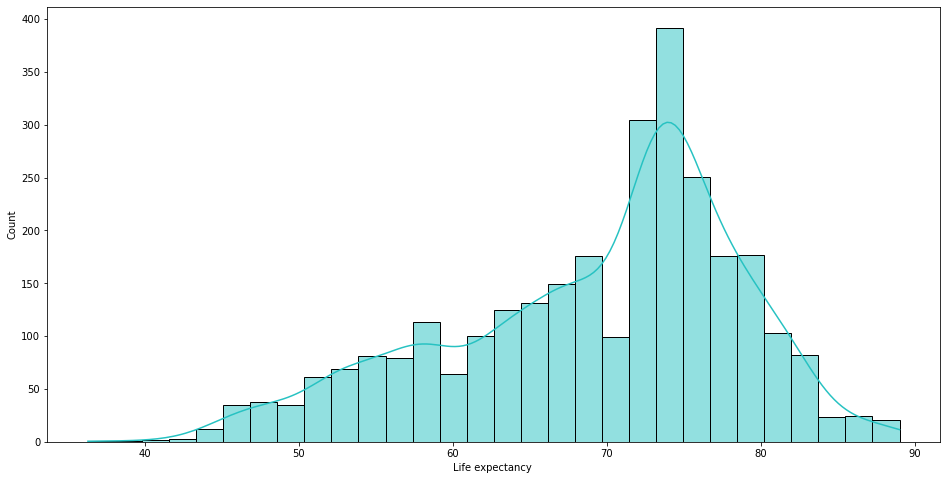

In [14]:
fig = plt.figure(figsize=(16,8))

sns.histplot(life_expect['Life expectancy '],kde=True,color=FeatureEngineering.get_color())
plt.show()

## Now we have some basic understanding about the distribution of our target variable

<br><br><br><br><br><br><br><br>

# Let's start the actual work now :)

### Splitting The Data :

In [15]:
from sklearn.model_selection import train_test_split

x = life_expect.drop('Life expectancy ',axis=1)
y = life_expect[['Life expectancy ']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Showing Data :

In [16]:
X_train.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2268,Serbia,2012,Developing,126.0,1,9.38,742.510971,97.0,0,58.3,1,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0
1680,Mauritius,2002,Developing,179.0,0,4.14,369.631710,88.0,0,26.4,0,88.0,4.24,88.0,0.1,3957.512960,124621.0,7.9,7.9,0.683,12.5
2785,United Republic of Tanzania,2008,Developing,376.0,92,3.44,0.000000,86.0,3413,19.6,138,89.0,4.21,86.0,7.4,NaN,NaN,7.3,7.3,NaN,NaN
2512,Sweden,2008,Developed,62.0,0,6.90,8105.590882,NaN,25,56.5,0,98.0,9.23,98.0,0.1,55746.842380,9219637.0,1.3,1.3,0.897,15.7
1090,Guinea-Bissau,2015,Developing,275.0,4,NaN,0.000000,87.0,153,26.3,6,87.0,NaN,87.0,3.2,596.871719,177526.0,7.1,7.0,0.421,9.2


In [17]:
y_train.head()

,Life expectancy
2268,74.9
1680,71.5
2785,56.2
2512,81.1
1090,58.9


## For visualizations I will make a new dataframe which is `train_set` (X_train + y_train)

In [18]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
2268,Serbia,2012,Developing,126.0,1,9.38,742.510971,97.0,0,58.3,1,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0,74.9
1680,Mauritius,2002,Developing,179.0,0,4.14,369.631710,88.0,0,26.4,0,88.0,4.24,88.0,0.1,3957.512960,124621.0,7.9,7.9,0.683,12.5,71.5
2785,United Republic of Tanzania,2008,Developing,376.0,92,3.44,0.000000,86.0,3413,19.6,138,89.0,4.21,86.0,7.4,NaN,NaN,7.3,7.3,NaN,NaN,56.2
2512,Sweden,2008,Developed,62.0,0,6.90,8105.590882,NaN,25,56.5,0,98.0,9.23,98.0,0.1,55746.842380,9219637.0,1.3,1.3,0.897,15.7,81.1
1090,Guinea-Bissau,2015,Developing,275.0,4,NaN,0.000000,87.0,153,26.3,6,87.0,NaN,87.0,3.2,596.871719,177526.0,7.1,7.0,0.421,9.2,58.9


### I will do some cleaning while working on the train_set then I will remember all of what I will do then,<br><br> I will put all of them on a pipline and I will apply this pipline on `X_train` and `X_test` data

## Now I will work on understanding the train_set without looking at test (to avoid overfitting by knowing the test relations) <br><br>

<br><br><br><br><br><br>

# Let's explore more using data visualizations :<br><br><br><br>

# Categorical Data :

In [19]:
for i in train_set.columns:
    if train_set[i].dtype == 'object':
        print(Fore.BLACK,'\nNumber of unique data in the {} is : '.format(i)
            ,Fore.CYAN,len(train_set[i].unique()))

 
Number of unique data in the Country is :   183
 
Number of unique data in the Status is :   2


### We have `183` different country let's see top 20 of them (this represents number of people from this country)

In [20]:
pd.DataFrame(train_set['Country'].value_counts(ascending=False)).head(20)

,Country
Paraguay,16
Costa Rica,16
Latvia,16
Iceland,16
Botswana,16
Afghanistan,15
Mauritania,15
Ethiopia,15
Democratic People's Republic of Korea,15
Mali,15


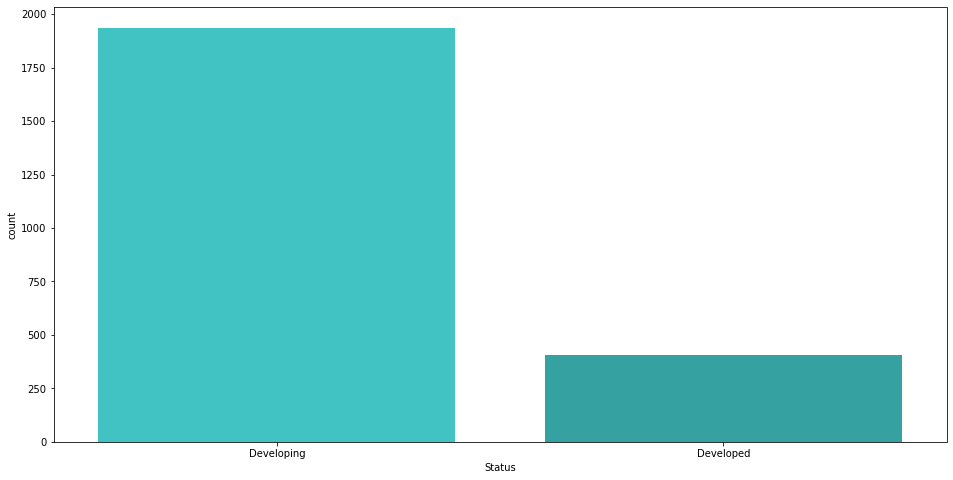

In [21]:
fig = plt.figure(figsize=(16,8))

sns.countplot(train_set['Status'],
              palette=FeatureEngineering.create_sequential_palette(4)[::-1])
plt.show()

### Let's see how status effect the Life expectancy :

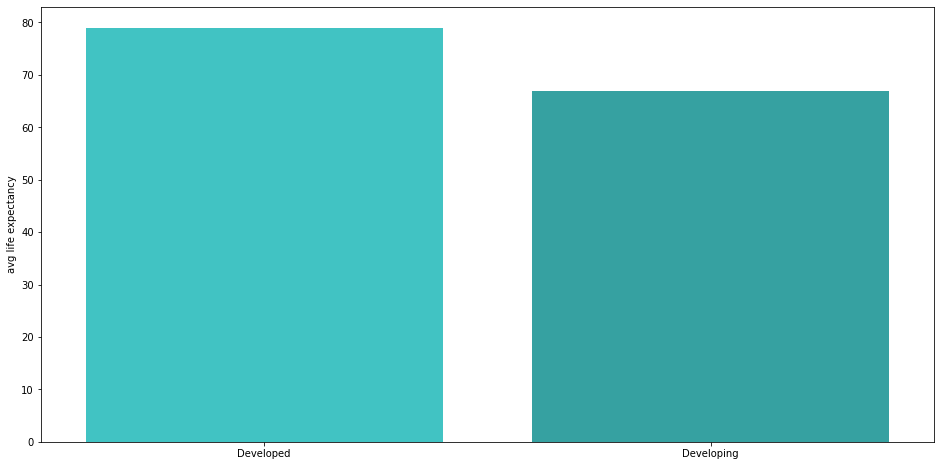

In [22]:
to_plot = {
    'Developed' : int((train_set['Life expectancy '][train_set['Status']=='Developed']).mean()),
    'Developing' : int((train_set['Life expectancy '][train_set['Status']=='Developing']).mean())
}

fig = plt.figure(figsize=(16,8))
sns.barplot(x=pd.DataFrame(to_plot,index=['avg life expectancy']).T.index,
            y=pd.DataFrame(to_plot,index=['avg life expectancy']).T['avg life expectancy'],
            palette=FeatureEngineering.create_sequential_palette(4)[::-1])
plt.show()

In [23]:
pd.DataFrame(to_plot,index=['avg life expectancy']).T

,avg life expectancy
Developed,79
Developing,67


## As expected developed countries has higher `avg life expectancy`

<br><br><br><br><br><br>

# Numerical Data : <br><br>

## Let's start by showing correlations between our features :

In [24]:
countinous_data = []

for i in train_set.columns:
    if train_set[i].dtype != 'object':
        countinous_data.append(i)
        

print(countinous_data)

['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']


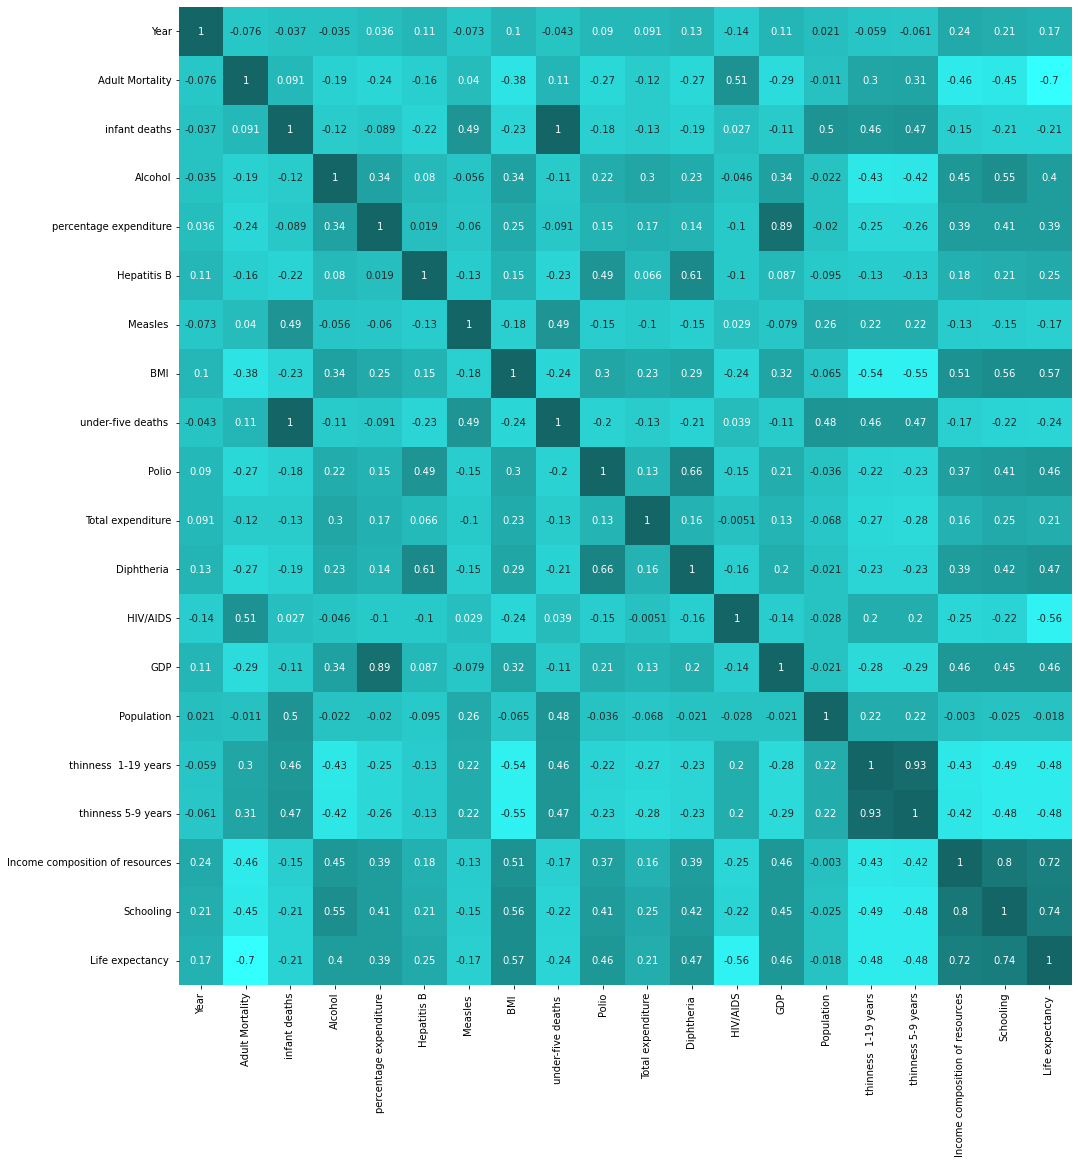

In [25]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(train_set[countinous_data].corr(), annot=True,
                      cmap=FeatureEngineering.create_sequential_palette(400)[::-1]
                      ,cbar=False)

## We have features here with very high correlation with each other... I will drop some of them (dimensionality reduction)

### High correlated features :
> - `under-five deaths` and `infant deaths` <br><br>
> - `GDP` and `percentage expenditure`<br><br>
> - `thinness 5-9 years` and `thinness 1-19 years`<br><br>
> - `Income composition of resources` and `Schooling`

<b><hr style="border-top: 4px solid black;"/></b>



## Let's have a better look on the data with the high correlation :

#### - under-five deaths and infant deaths :

In [26]:
train_set[['under-five deaths ','infant deaths']].head()

,under-five deaths,infant deaths
2268,1,1
1680,0,0
2785,138,92
2512,0,0
1090,6,4


### `infant deaths` will be droped because there age range is from 0-1 year so `under-five deaths` is more representative <br><br>

#### - GDP and percentage expenditure :

In [27]:
train_set[['GDP','percentage expenditure']][train_set['percentage expenditure']==0].head(20)

,GDP,percentage expenditure
2785,NaN,0.0
1090,596.871719,0.0
2175,NaN,0.0
2801,NaN,0.0
2868,NaN,0.0
435,NaN,0.0
163,NaN,0.0
1439,NaN,0.0
2887,NaN,0.0
2776,NaN,0.0


In [28]:
train_set[['GDP','percentage expenditure']][train_set['GDP'].isna()].head(20)

,GDP,percentage expenditure
2785,NaN,0.0
2175,NaN,0.0
2801,NaN,0.0
2868,NaN,0.0
435,NaN,0.0
163,NaN,0.0
1439,NaN,0.0
2887,NaN,0.0
2776,NaN,0.0
2875,NaN,0.0


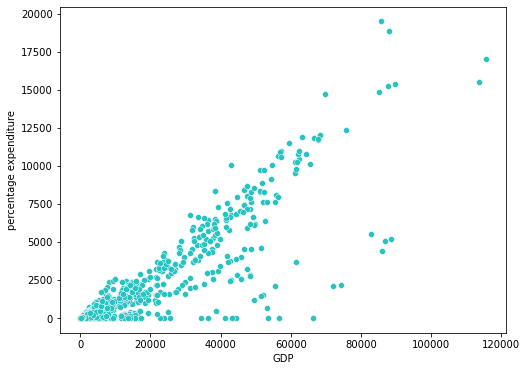

In [29]:
train_set[['GDP','percentage expenditure']]
sns.scatterplot(x='GDP',y='percentage expenditure',data=train_set,color=FeatureEngineering.get_color())
plt.show()

### Oh !! after investegating looks like `percentage expenditure` has some error data points

### Where it is depending on GDP and when GDP is nan it gives 0... having it in our data will cause a discontinouty in the manifold's space while doing the model 

### SO percentage expenditure will be dropped !!!! <br><br>

#### - thinness 5-9 years and thinness 1-19 years :

In [30]:
train_set[[' thinness  1-19 years',' thinness 5-9 years']].head()

,thinness 1-19 years,thinness 5-9 years
2268,2.1,2.1
1680,7.9,7.9
2785,7.3,7.3
2512,1.3,1.3
1090,7.1,7.0


### Just like children and infants death... here `thinness 1-19 years` is more general <br><br>

#### - Income composition of resources and Schooling

In [31]:
train_set[['Income composition of resources','Schooling']].head()

,Income composition of resources,Schooling
2268,0.767,14.0
1680,0.683,12.5
2785,NaN,NaN
2512,0.897,15.7
1090,0.421,9.2


### Wow ! after searching literlly both of them has no direct relation....
### Let's check which feature to drop using feature importance

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='median')

x_select = train_set[['Income composition of resources','Schooling']]
y_select = train_set[['Life expectancy ']]

x_select = pd.DataFrame(impute.fit_transform(x_select),columns=['Income composition of resources','Schooling'])
y_select = impute.fit_transform(y_select)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_select, y_select)

for feature, importance in zip(x_select.columns, rf.feature_importances_):
    print(f"{str(feature).strip()}:  {importance:.4f}")

Income composition of resources:  0.8747
Schooling:  0.1253


### Both looks important... so in one of my pipelines I will keep both and in another I will drop `Schooling`

<b><hr style="border-top: 4px solid black;"/></b>

### I have to drop one of every 2 highly correlated features to reduce the dimensions... <br><br>But which feature to use? let's see 

### After more investigations to the data... I will drop these columns :
> - `infant deaths` will be droped because there age range is from 0-1 year so `under-five deaths` is more representative <br><br>
> - `percentage expenditure` will be dropped because it has wrong data values<br><br>
> - `thinness 5-9 years` will be droped because `thinness 1-19 years` is more representative<br><br>
> - `Income composition of resources` will be droped because `schooling` is better in linear relation and skewness

## Ok let's drop them !!

In [33]:
try:
    train_set.drop(['infant deaths','percentage expenditure',' thinness 5-9 years','Schooling']
                  ,axis=1,inplace=True)
except:
    print('Dropped before !!')
    
train_set.head()

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Life expectancy
2268,Serbia,2012,Developing,126.0,9.38,97.0,0,58.3,1,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,0.767,74.9
1680,Mauritius,2002,Developing,179.0,4.14,88.0,0,26.4,0,88.0,4.24,88.0,0.1,3957.512960,124621.0,7.9,0.683,71.5
2785,United Republic of Tanzania,2008,Developing,376.0,3.44,86.0,3413,19.6,138,89.0,4.21,86.0,7.4,NaN,NaN,7.3,NaN,56.2
2512,Sweden,2008,Developed,62.0,6.90,NaN,25,56.5,0,98.0,9.23,98.0,0.1,55746.842380,9219637.0,1.3,0.897,81.1
1090,Guinea-Bissau,2015,Developing,275.0,NaN,87.0,153,26.3,6,87.0,NaN,87.0,3.2,596.871719,177526.0,7.1,0.421,58.9


## Now I did some dimensionality reduction :)
### Time to get rid of the NaN values...

### Let's have a look about which data is discreate and which is continous :

In [34]:
countinous_data = []

for i in train_set.columns:
    if train_set[i].dtype != 'object':
        countinous_data.append(i)
        

print(countinous_data)

['Year', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 'Income composition of resources', 'Life expectancy ']


In [35]:
for i in countinous_data:
    print(Fore.LIGHTBLACK_EX,'\nNumber of unique data in the {} is : '.format(i)
            ,Fore.CYAN,len(train_set[i].unique()))

 
Number of unique data in the Year is :   16
 
Number of unique data in the Adult Mortality is :   407
 
Number of unique data in the Alcohol is :   979
 
Number of unique data in the Hepatitis B is :   87
 
Number of unique data in the Measles  is :   797
 
Number of unique data in the  BMI  is :   589
 
Number of unique data in the under-five deaths  is :   233
 
Number of unique data in the Polio is :   74
 
Number of unique data in the Total expenditure is :   774
 
Number of unique data in the Diphtheria  is :   80
 
Number of unique data in the  HIV/AIDS is :   184
 
Number of unique data in the GDP is :   1996
 
Number of unique data in the Population is :   1827
 
Number of unique data in the  thinness  1-19 years is :   193
 
Number of unique data in the Income composition of resources is :   605
 
Number of unique data in the Life expectancy  is :   356


<br><br>
### Looks like `Year` is the only discreate here !!

### I will use my custom function in `Visuals.py` to plot continous data :

<Figure size 576x432 with 0 Axes>

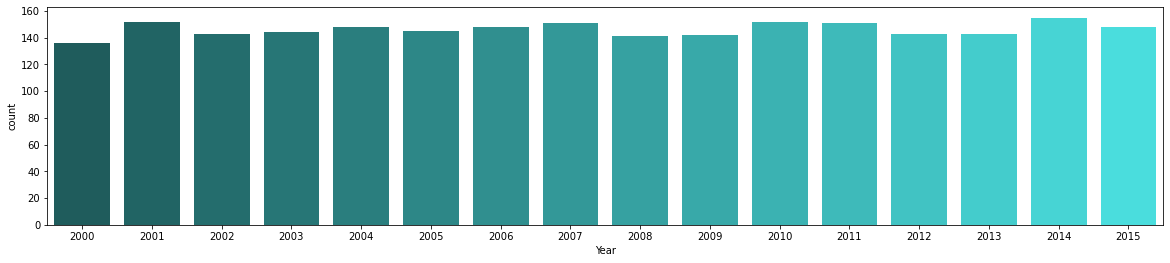

<Figure size 1440x288 with 0 Axes>

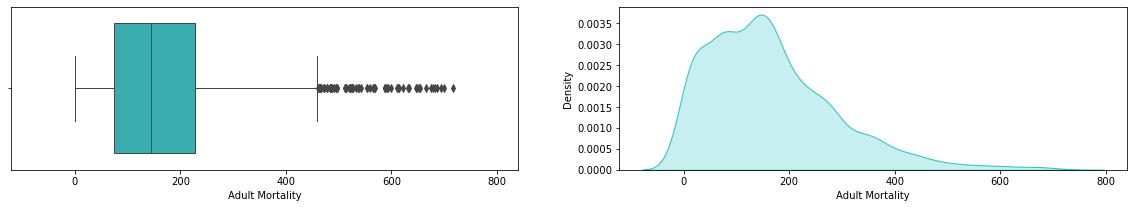

<Figure size 1440x216 with 0 Axes>

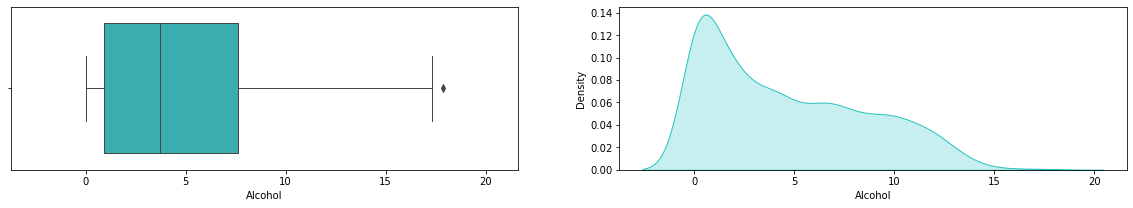

<Figure size 1440x216 with 0 Axes>

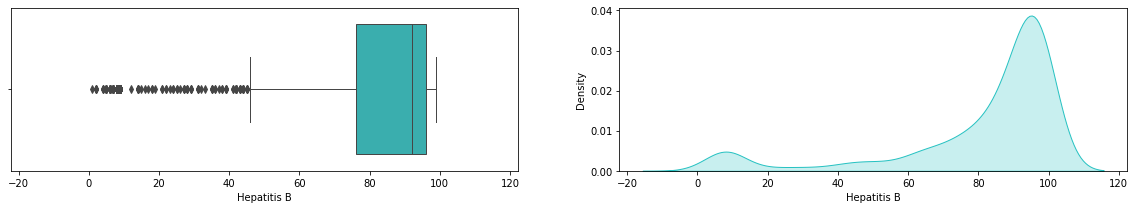

<Figure size 1440x216 with 0 Axes>

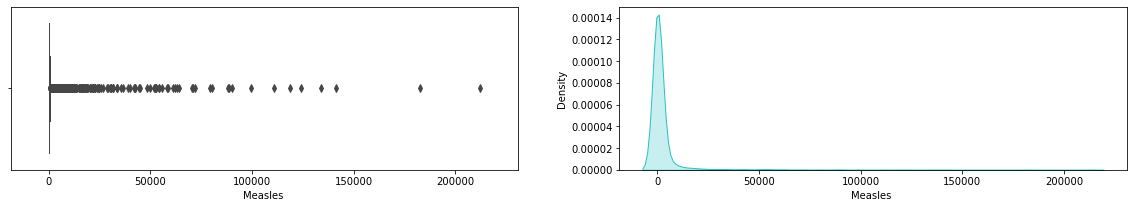

<Figure size 1440x216 with 0 Axes>

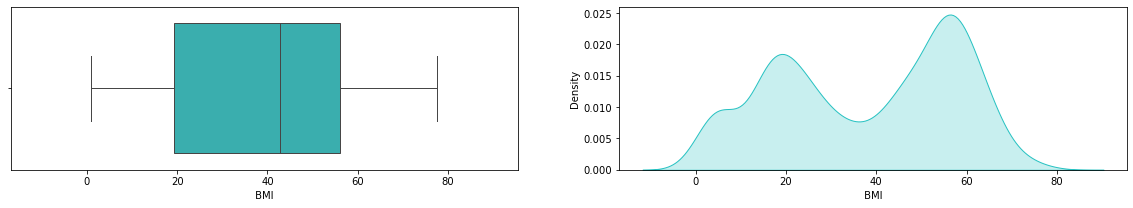

<Figure size 1440x216 with 0 Axes>

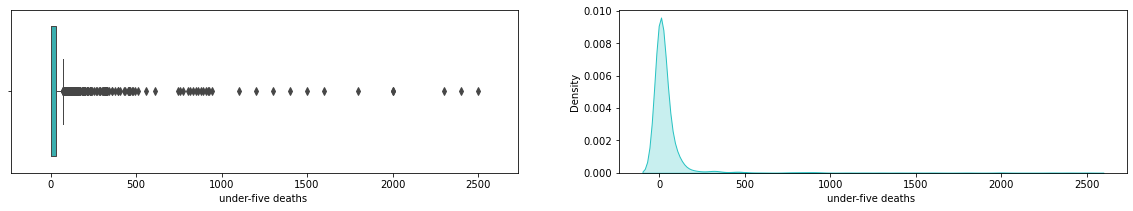

<Figure size 1440x216 with 0 Axes>

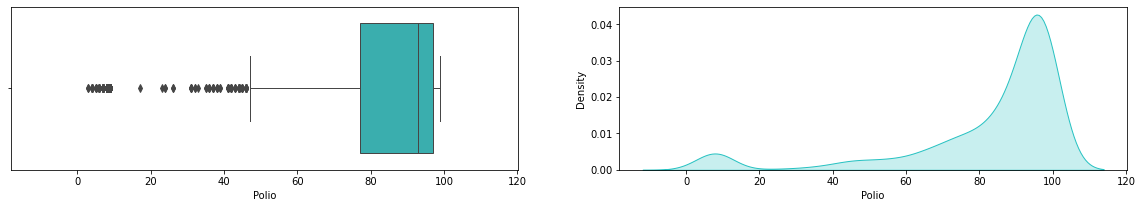

<Figure size 1440x216 with 0 Axes>

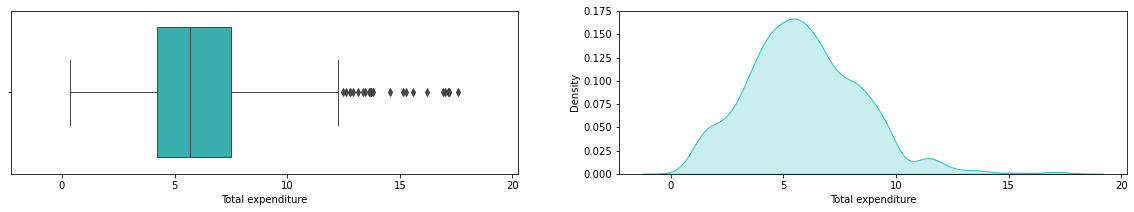

<Figure size 1440x216 with 0 Axes>

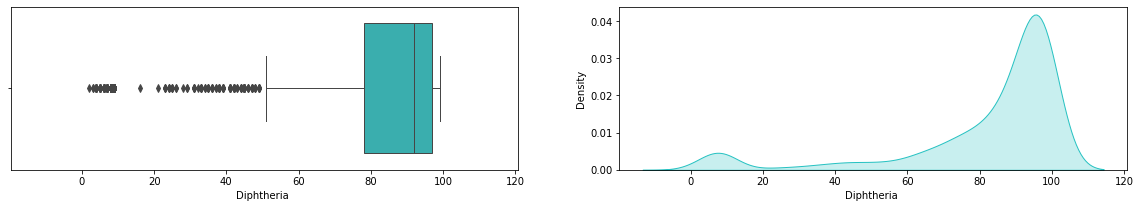

<Figure size 1440x216 with 0 Axes>

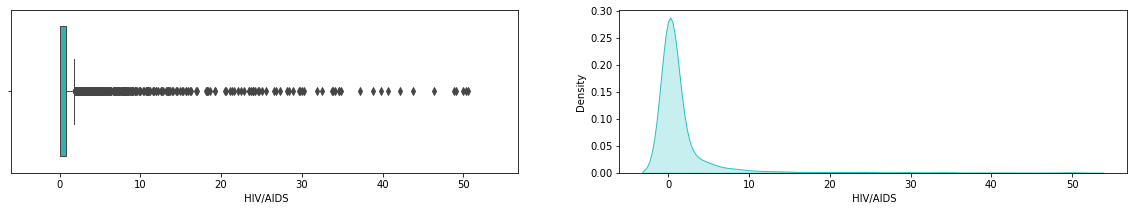

<Figure size 1440x216 with 0 Axes>

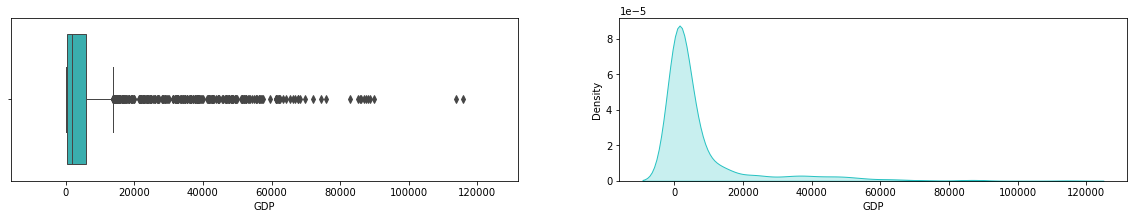

<Figure size 1440x216 with 0 Axes>

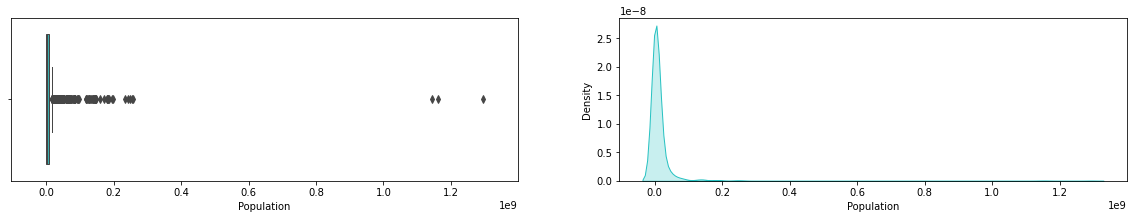

<Figure size 1440x216 with 0 Axes>

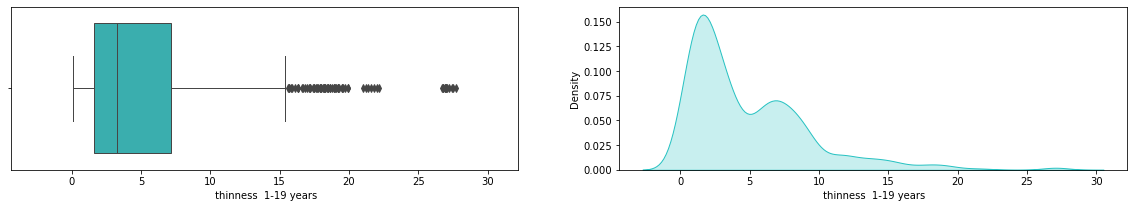

<Figure size 1440x216 with 0 Axes>

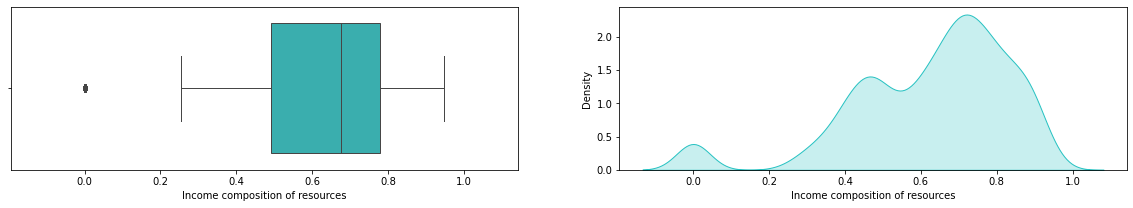

<Figure size 1440x216 with 0 Axes>

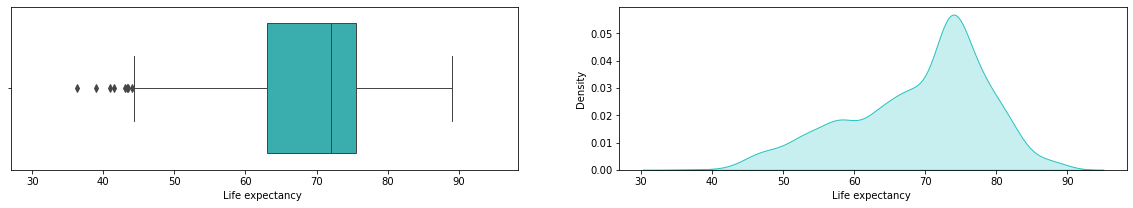

In [36]:
FeatureEngineering.continuous_data_distribution(train_set,countinous_data)

## Wow data skewness is litterly bad :(

### Ok before treating it let's see how our countinous data effects our target variable :
### I will be using a function that I made...

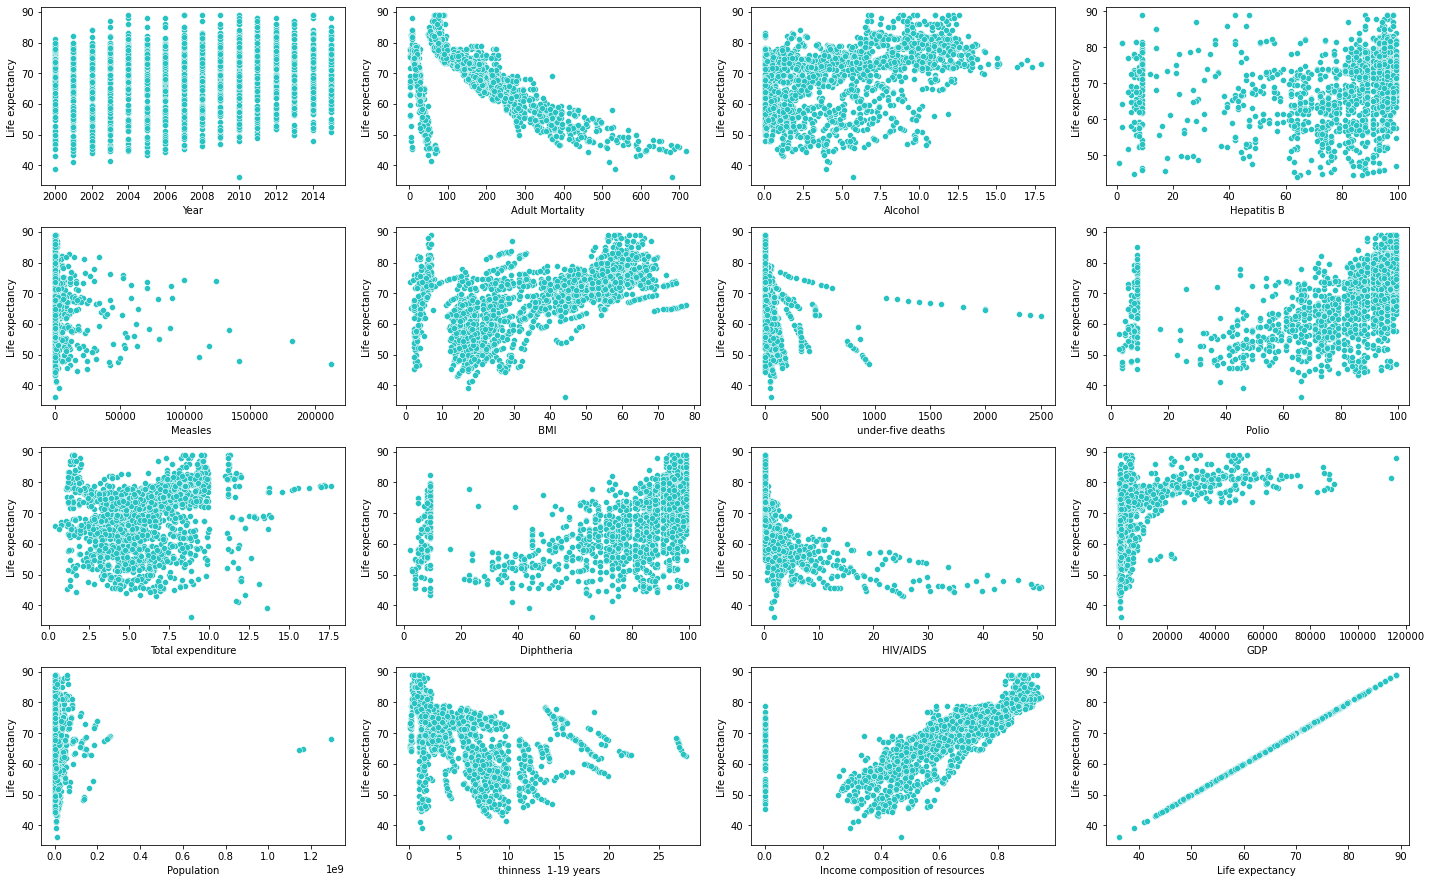

In [37]:
FeatureEngineering.countinous_data_scatterplot(train_set)

## Oh :(
### Data don't like fine here either....

### Too many outliers... I have to know why there is so many outliers... <br>But when I saw the way the data is distributed by scatter plot I can assume that :<br><br>I can assume that using `Median` will be good imputation method And that is because : 
> - there is little NaN values. <br><br>
> - and there is outliers.<br><br>
> - looks like It won't harm the shape of our manifold

In [38]:
pd.DataFrame(train_set.isna().sum()/len(train_set) * 100)

,0
Country,0.000000
Year,0.000000
Status,0.000000
Adult Mortality,0.000000
Alcohol,6.618275
Hepatitis B,18.958155
Measles,0.000000
BMI,1.110162
under-five deaths,0.000000
Polio,0.597780


In [39]:
train_set['Hepatitis B'].describe()

count    1898.000000
mean       80.747629
std        25.124593
min         1.000000
25%        76.000000
50%        92.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64

<b><hr style="border-top: 4px solid black;"/></b>

## `Hepatitis B` and `Polio` column :

### I will try to do something in feature engineering which may treat both of these columns...
### Since both of this data are from vaccinations, I will create new column named as `vaccinations` and I will add both of them in it and using feature selection we will check which is better

### In one of my pipelines I will use column `vaccinations` and drop others, while in another pipeline I won't do so...

In [40]:
train_set['vaccinations'] = train_set[['Hepatitis B', 'Polio']].sum(axis=1)
train_set.head()

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Life expectancy,vaccinations
2268,Serbia,2012,Developing,126.0,9.38,97.0,0,58.3,1,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,0.767,74.9,190.0
1680,Mauritius,2002,Developing,179.0,4.14,88.0,0,26.4,0,88.0,4.24,88.0,0.1,3957.512960,124621.0,7.9,0.683,71.5,176.0
2785,United Republic of Tanzania,2008,Developing,376.0,3.44,86.0,3413,19.6,138,89.0,4.21,86.0,7.4,NaN,NaN,7.3,NaN,56.2,175.0
2512,Sweden,2008,Developed,62.0,6.90,NaN,25,56.5,0,98.0,9.23,98.0,0.1,55746.842380,9219637.0,1.3,0.897,81.1,98.0
1090,Guinea-Bissau,2015,Developing,275.0,NaN,87.0,153,26.3,6,87.0,NaN,87.0,3.2,596.871719,177526.0,7.1,0.421,58.9,174.0


### let's our new column properties :

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)

train_set[['Hepatitis B','Polio']] = imputer.fit_transform(train_set[['Hepatitis B','Polio']])

In [42]:
train_set[['vaccinations','Hepatitis B','Polio']].isna().sum()

vaccinations    0
Hepatitis B     0
Polio           0
dtype: int64

### No NaN values :)
### Ok this worked because some people don't take specific vaccine and take others, so in another pipeline I will impute missing in these columns by 0

<Figure size 1440x720 with 0 Axes>

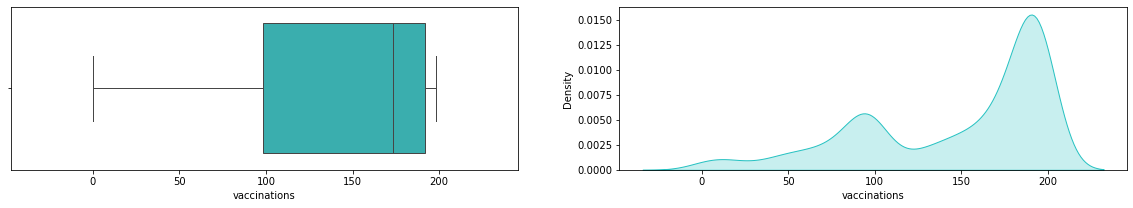

In [43]:
FeatureEngineering.continuous_data_distribution(train_set,['vaccinations'])

### Looks like it is fine now... it may need only some transformation before the model and it will be alright

<b><hr style="border-top: 4px solid black;"/></b>


## `Population` column :

### Let's visualize it :

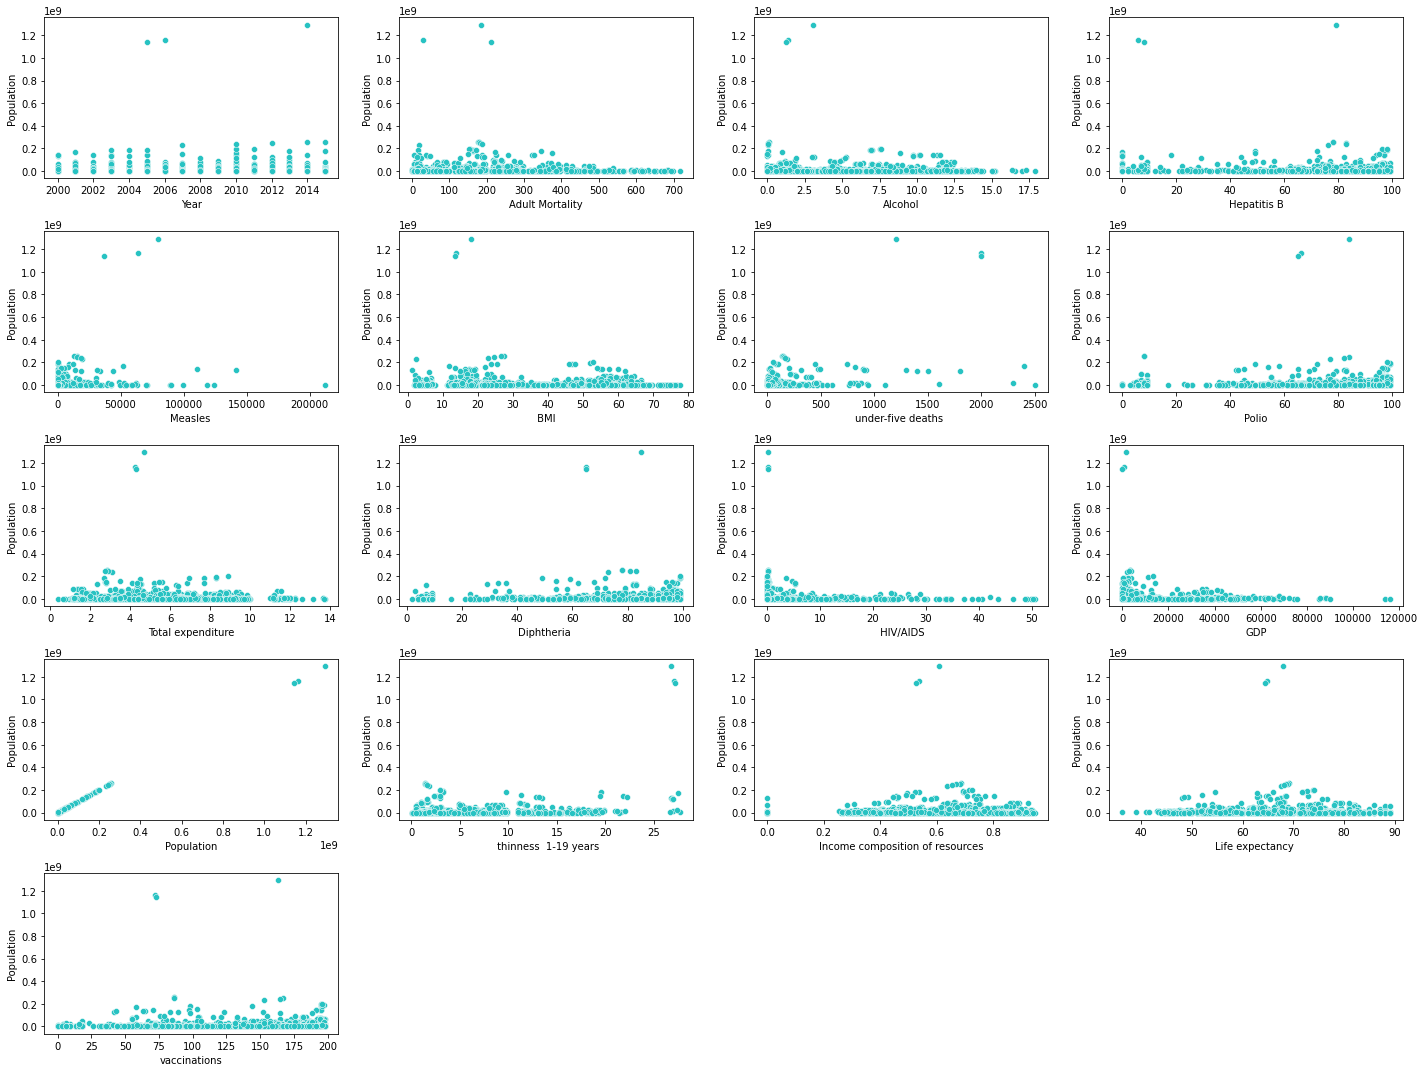

In [44]:
FeatureEngineering.countinous_data_scatterplot(train_set,target='Population')

### Looks like it has no correlation with another feature so I will clean outliers then I will use `median`

### After some google search... this may also look alright to have outliers in `Population` column as there may be counries with high population

### having look between `Population` and `Life expectancy` plots.... looks like the large outliers here don't even effect the target variable

### These large outliers are roughly 3 points so I will drop them here... and I will make a pipeline to drop them on train data and another one to transform them in train data

In [45]:
large_outliers_population = train_set[train_set['Population'] > 1000000000]
large_outliers_population

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Life expectancy,vaccinations
1187,India,2014,Developing,184.0,3.07,79.0,79563,18.1,1200,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,0.607,68.0,163.0
1195,India,2006,Developing,28.0,1.37,6.0,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,0.536,64.8,72.0
1196,India,2005,Developing,211.0,1.27,8.0,36711,13.5,2000,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,0.526,64.4,73.0


<Figure size 1440x720 with 0 Axes>

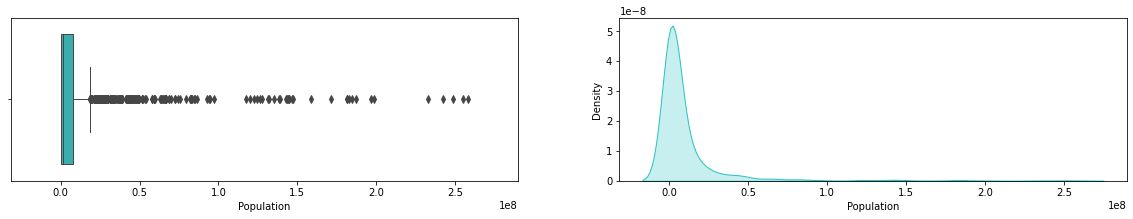

In [46]:
try :
    train_set.drop(large_outliers_population.index,axis=0,inplace=True)
except:
    print('Dropped before !!!')
    
FeatureEngineering.continuous_data_distribution(train_set,['Population'])

### A step forward at least...

In [47]:
print(Fore.CYAN,'Median of data is :',train_set['Population'].median())

 Median of data is : 1440206.0


In [48]:
from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer()

train_set['Population'] = imputer.fit_transform(pd.DataFrame(train_set['Population']))
train_set['Population'].isna().sum()

0

<b><hr style="border-top: 4px solid black;"/></b>

## `Alcohol` column :

<Figure size 1440x720 with 0 Axes>

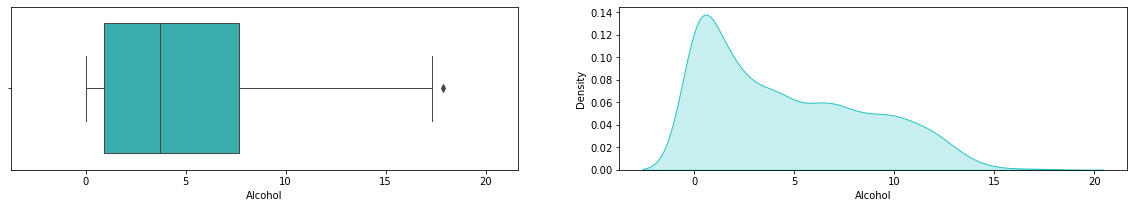

In [49]:
FeatureEngineering.continuous_data_distribution(train_set,['Alcohol'])

### Median imputing looks fine, and also there is no too much nan values

In [50]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
train_set['Alcohol'] = imputer.fit_transform(train_set[['Alcohol']])

train_set['Alcohol'].isna().sum()

0

### then log transform looks to be will performing here :)

<b><hr style="border-top: 4px solid black;"/></b>

## `GDP` column :

### first I want to also add a new feature which is GDP/Population as a  feature engineering method and say if that will be usefull while feature selection or no...

<Figure size 1440x720 with 0 Axes>

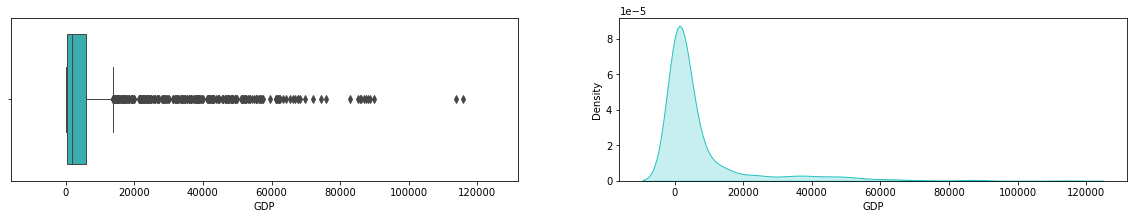

In [51]:
FeatureEngineering.continuous_data_distribution(train_set,['GDP'])

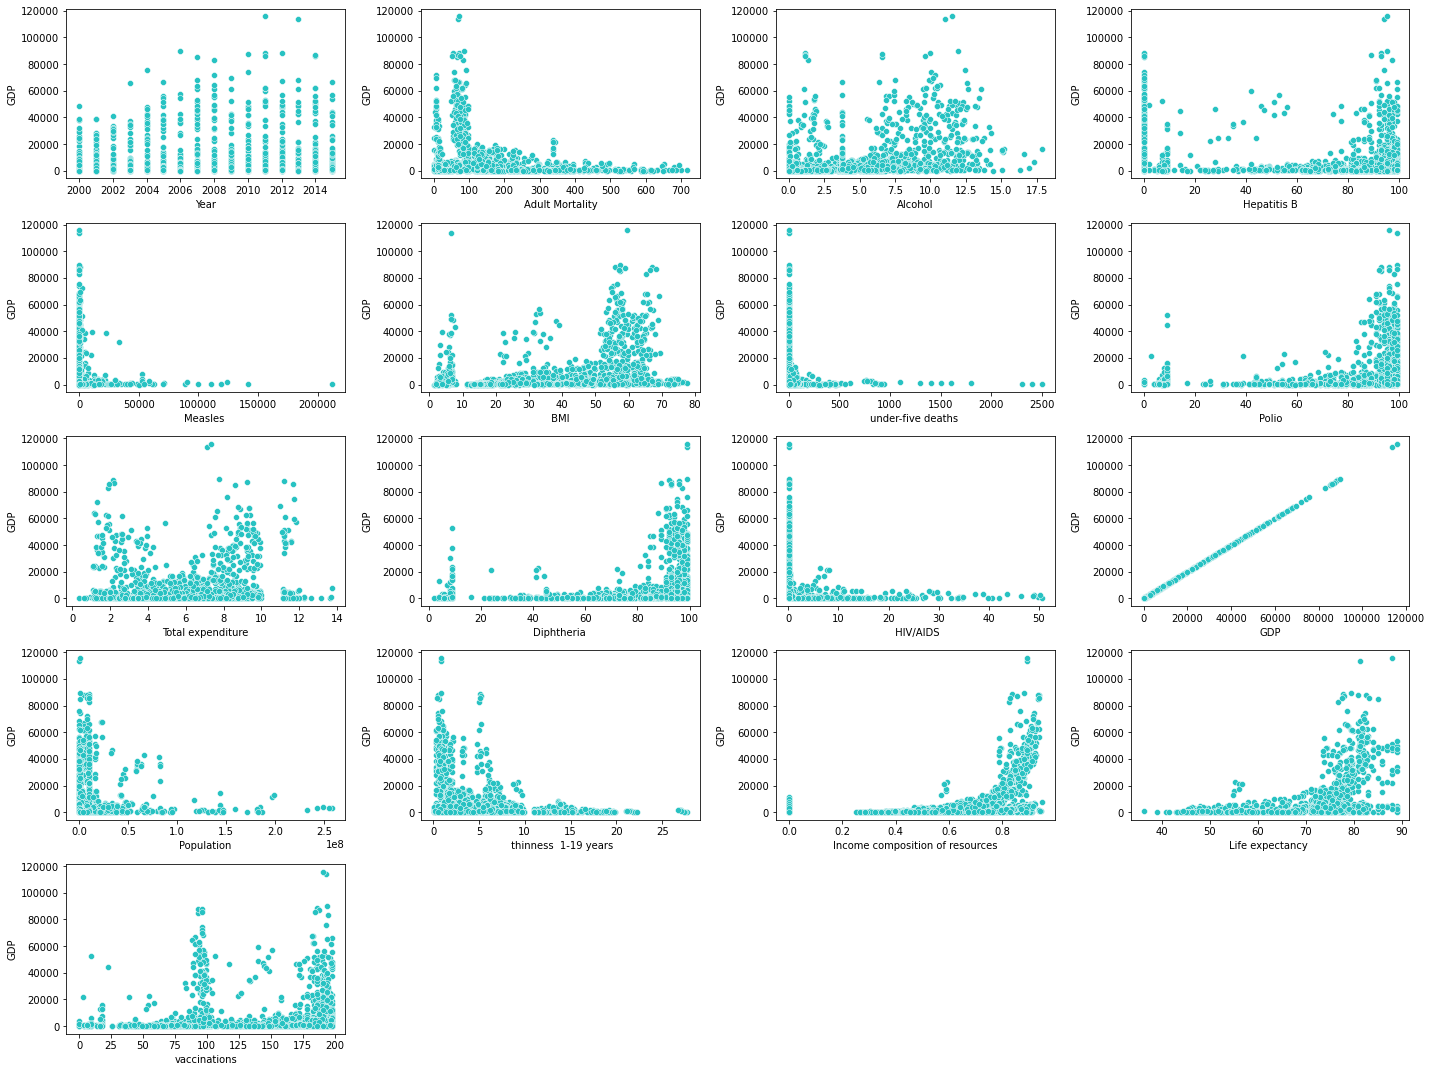

In [52]:
FeatureEngineering.countinous_data_scatterplot(train_set,target='GDP')

### Just like Alcohol median seems fine so we will use same on `GDP`

In [53]:
imputer = SimpleImputer(strategy='median')
train_set['GDP'] = imputer.fit_transform(train_set[['GDP']])

train_set['GDP'].isna().sum()

0

### I will add also new feature which i think may be helpful... which is `GDP per Population`

In [54]:
train_set['GDP per Population'] = train_set['GDP']/train_set['Population']

<Figure size 1440x720 with 0 Axes>

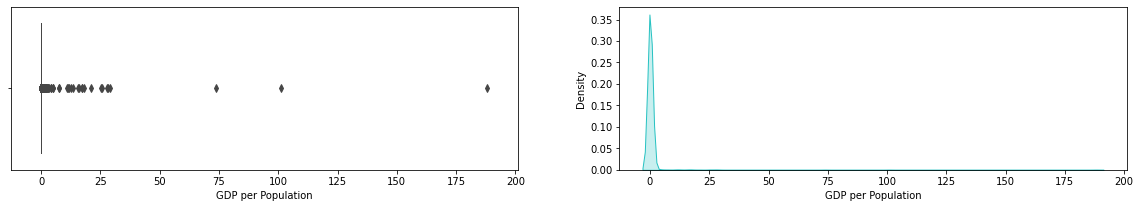

In [55]:
FeatureEngineering.continuous_data_distribution(train_set,['GDP per Population'])

### Wow don't look fine at all... but I will leave it till feature selection phase

### Also there will be some transformation methods...

<b><hr style="border-top: 4px solid black;"/></b>

## `Income composition of resources` column :

<Figure size 1440x720 with 0 Axes>

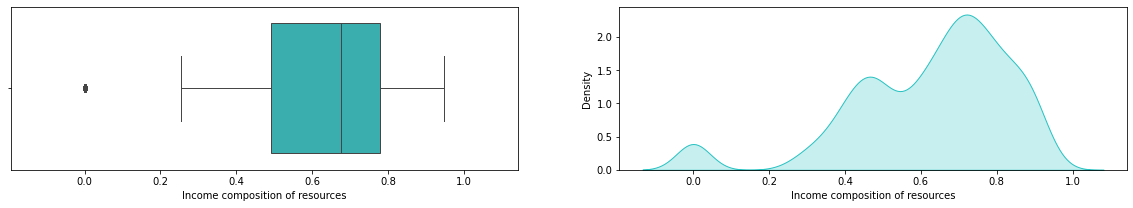

In [56]:
FeatureEngineering.continuous_data_distribution(train_set,['Income composition of resources'])

### Median here is good

In [57]:
imputer = SimpleImputer(strategy='median')
train_set['Income composition of resources'] = imputer.fit_transform(train_set[['Income composition of resources']])

train_set['Income composition of resources'].isna().sum()

0

### The problem is that these are true outliers, I don't want to remove them.....

### So I will use a different technique which is `Winsorization`

<Figure size 1440x720 with 0 Axes>

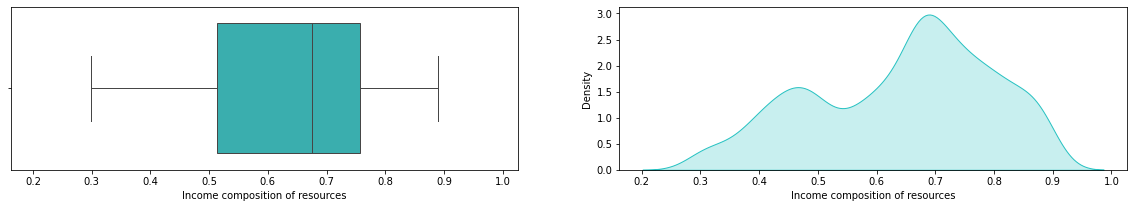

In [58]:
winsorization = FeatureEngineering.WinsorizationImpute(p=0.05, q=0.95, random_state=42)
train_set['Income composition of resources'] = winsorization.fit_transform(pd.DataFrame(train_set['Income composition of resources']))

FeatureEngineering.continuous_data_distribution(train_set,['Income composition of resources'])

### Ok now we reduced the effect of the outliers significantly, I want another approach in one of my pipelines where I won't remove outliers

<b><hr style="border-top: 4px solid black;"/></b>

### `Total expenditure` column

<Figure size 1440x720 with 0 Axes>

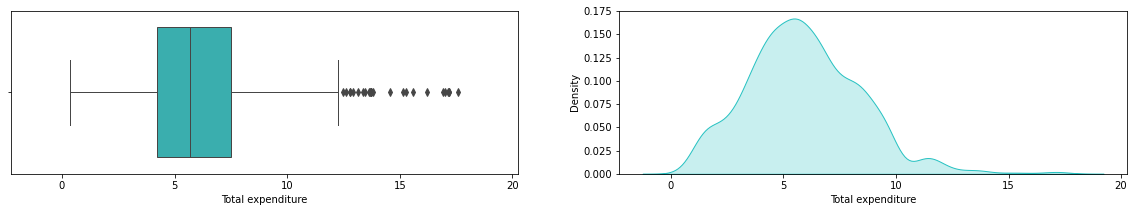

In [59]:
FeatureEngineering.continuous_data_distribution(train_set,['Total expenditure'])

### ok also median looks fine and log transform looks well too...

In [60]:
imputer = SimpleImputer(strategy='median')
train_set['Total expenditure'] = imputer.fit_transform(train_set[['Total expenditure']])

train_set['Total expenditure'].isna().sum()

0

<Figure size 1440x720 with 0 Axes>

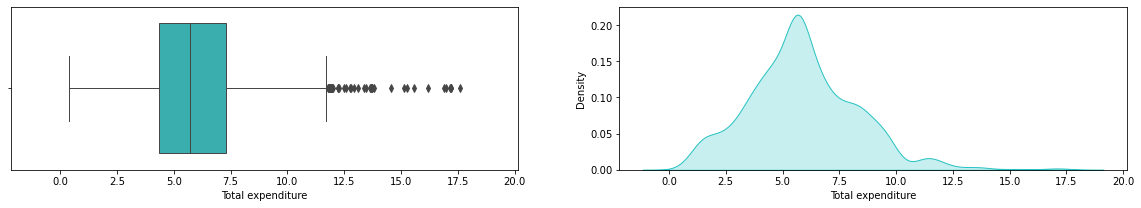

In [61]:
FeatureEngineering.continuous_data_distribution(train_set,['Total expenditure'])

### Skewness increased after median imputation (expected) but iam sure log transform will treat that :)

<b><hr style="border-top: 4px solid black;"/></b>

### `BMI`, `Diphtheria` and `thinness 1-19 years` columns

### This columns has little NaN Values so no need to give them much care as others, I will see them all at once

<Figure size 1440x720 with 0 Axes>

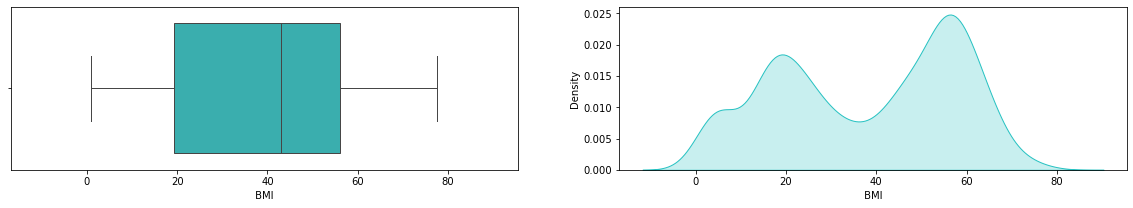

<Figure size 1440x216 with 0 Axes>

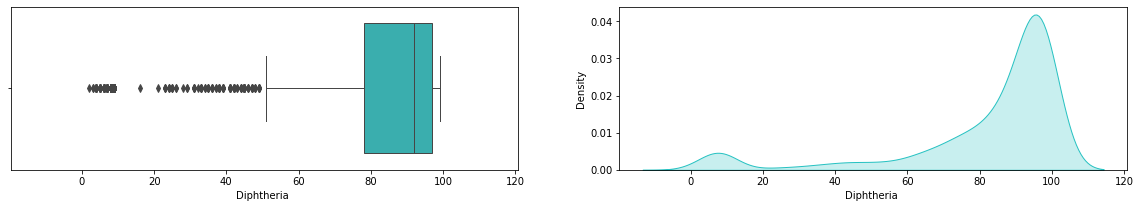

<Figure size 1440x216 with 0 Axes>

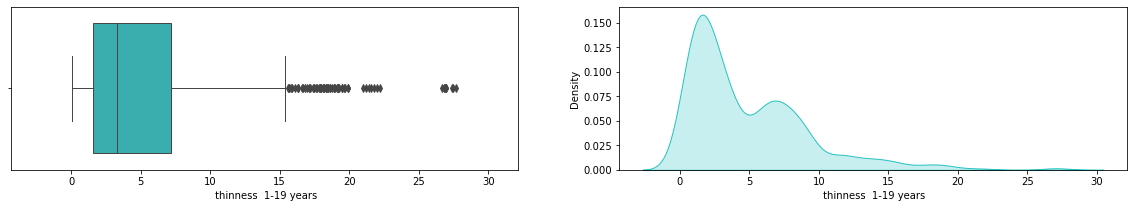

In [62]:
FeatureEngineering.continuous_data_distribution(train_set,[' BMI ','Diphtheria ',' thinness  1-19 years'])

### And again I will go for median...

In [63]:
imputer = SimpleImputer(strategy='median')

train_set[[' BMI ','Diphtheria ',' thinness  1-19 years']] = imputer.fit_transform(train_set[[' BMI ','Diphtheria ',' thinness  1-19 years']])
train_set[[' BMI ','Diphtheria ',' thinness  1-19 years']].isna().sum()

 BMI                     0
Diphtheria               0
 thinness  1-19 years    0
dtype: int64

### ok fine... I hope log transform will treat such things

<b><hr style="border-top: 4px solid black;"/></b>

### Number of NaN values now :

In [64]:
pd.DataFrame(train_set.isna().sum()/len(train_set) * 100)

,0
Country,0.0
Year,0.0
Status,0.0
Adult Mortality,0.0
Alcohol,0.0
Hepatitis B,0.0
Measles,0.0
BMI,0.0
under-five deaths,0.0
Polio,0.0


## Last thing on this data let's deal with the data skewness :

<br><br><br><br><br><br>

In [65]:
countinous_data = []

for i in train_set.columns:
    if train_set[i].dtype != 'object':
        countinous_data.append(i)

<Figure size 1440x720 with 0 Axes>

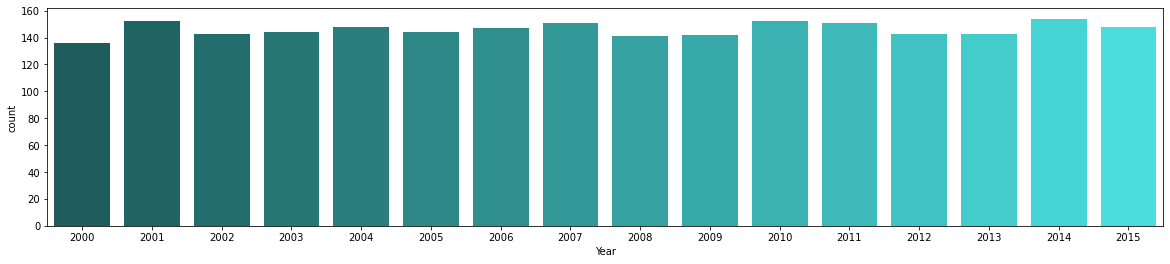

<Figure size 1440x288 with 0 Axes>

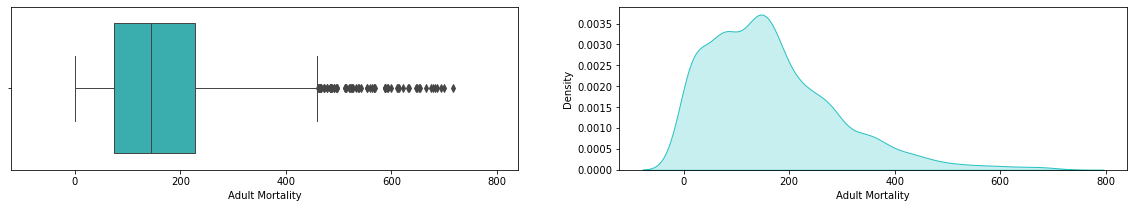

<Figure size 1440x216 with 0 Axes>

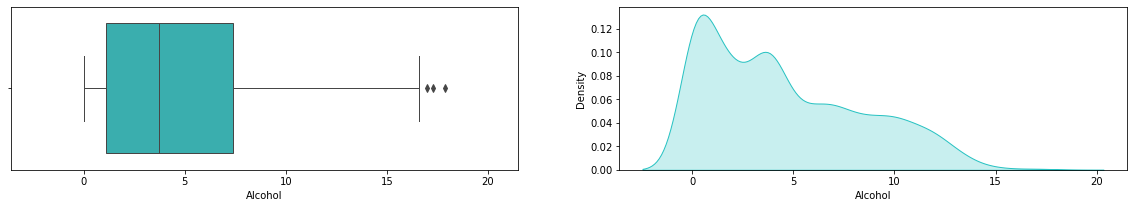

<Figure size 1440x216 with 0 Axes>

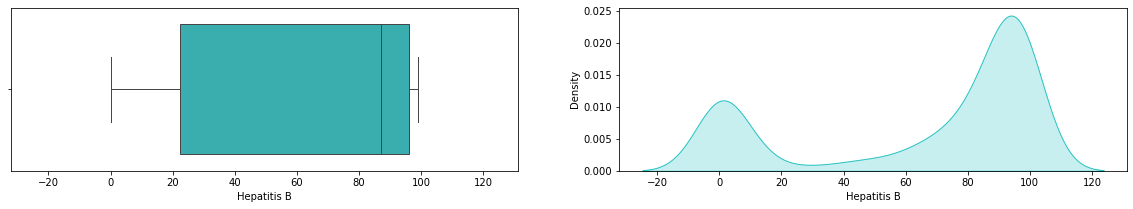

<Figure size 1440x216 with 0 Axes>

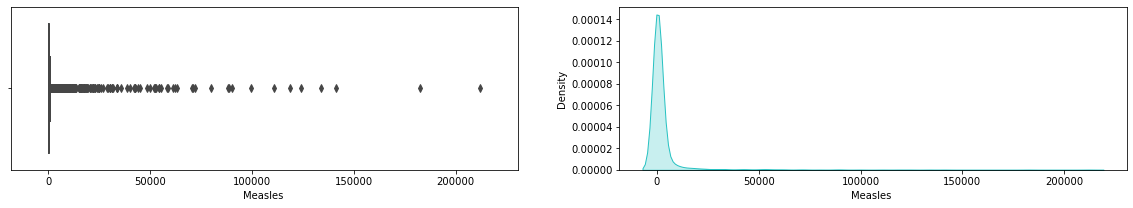

<Figure size 1440x216 with 0 Axes>

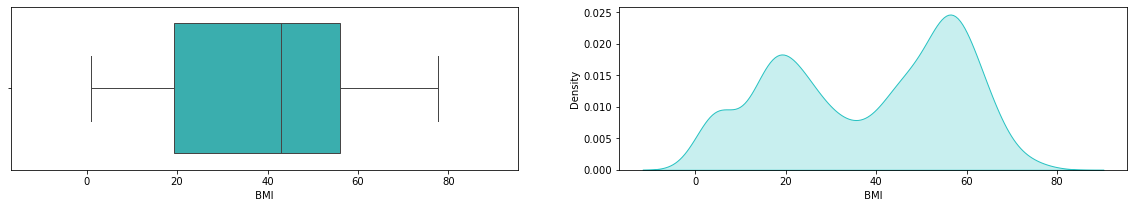

<Figure size 1440x216 with 0 Axes>

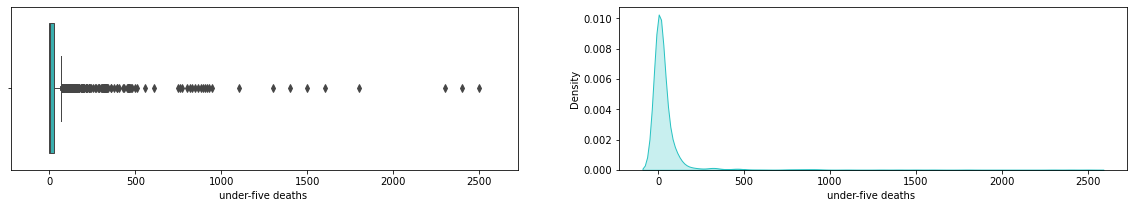

<Figure size 1440x216 with 0 Axes>

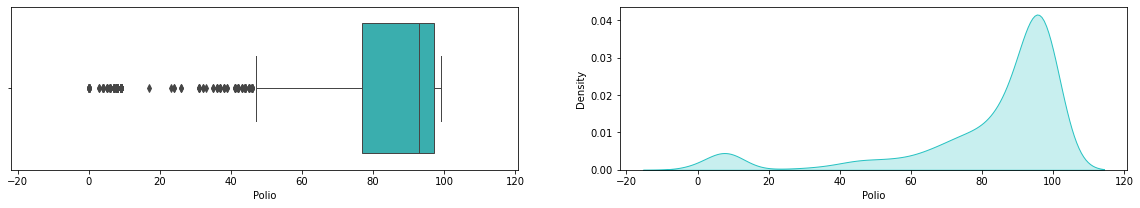

<Figure size 1440x216 with 0 Axes>

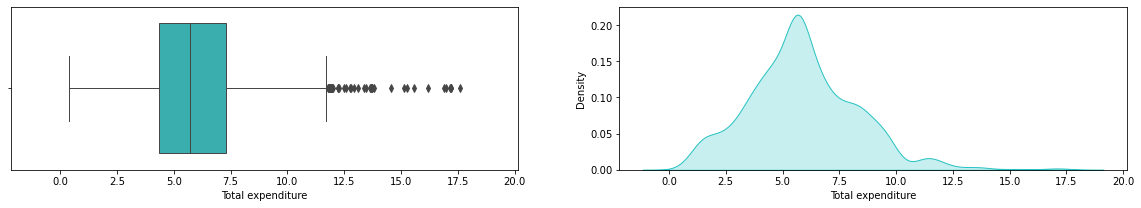

<Figure size 1440x216 with 0 Axes>

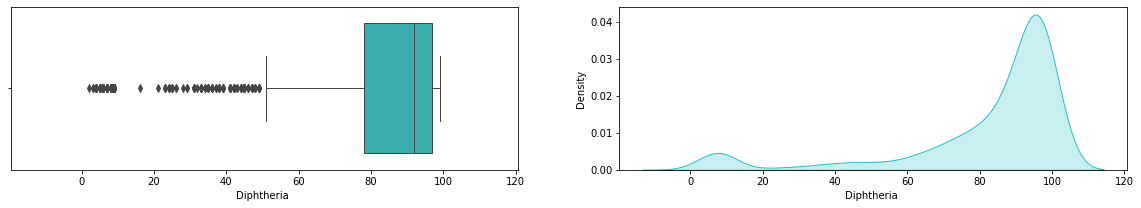

<Figure size 1440x216 with 0 Axes>

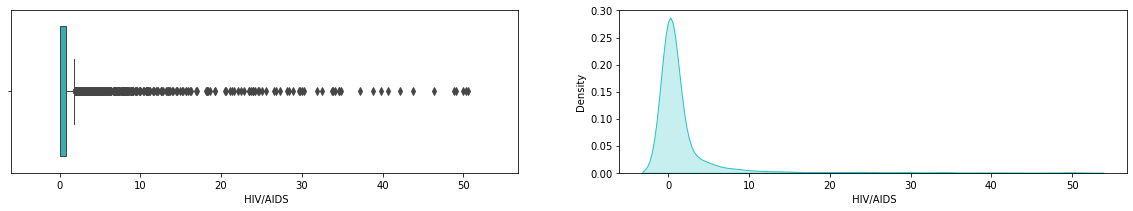

<Figure size 1440x216 with 0 Axes>

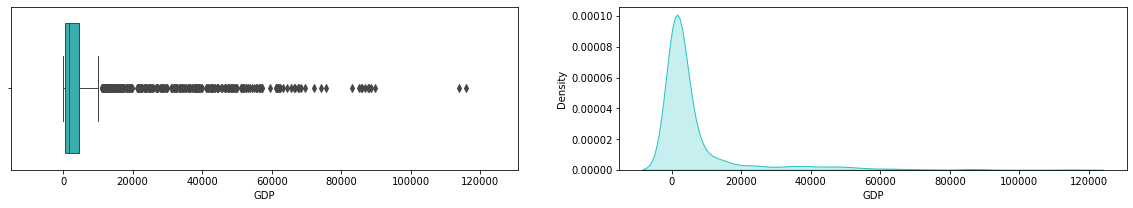

<Figure size 1440x216 with 0 Axes>

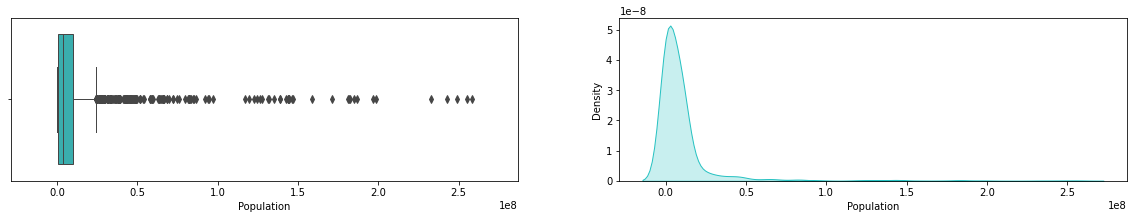

<Figure size 1440x216 with 0 Axes>

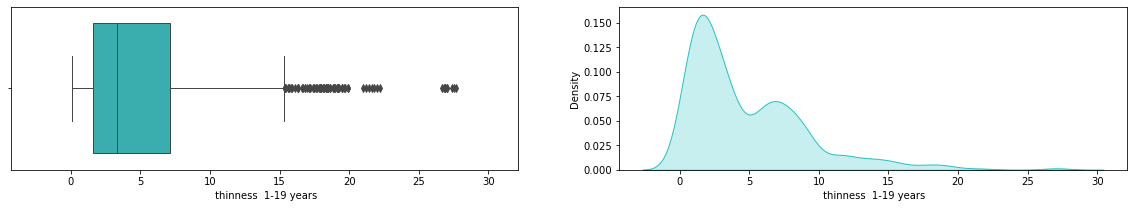

<Figure size 1440x216 with 0 Axes>

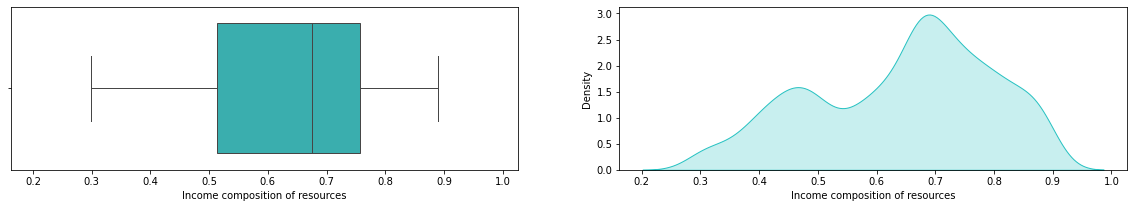

<Figure size 1440x216 with 0 Axes>

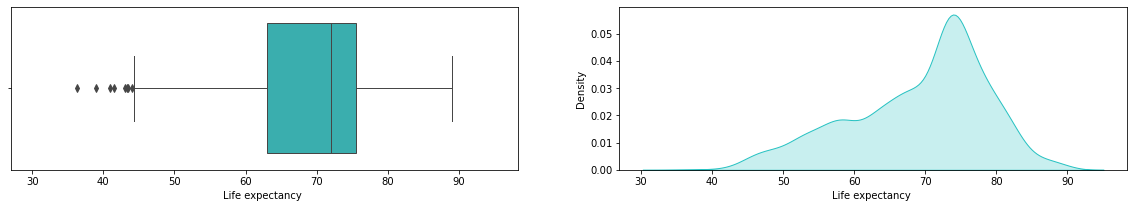

<Figure size 1440x216 with 0 Axes>

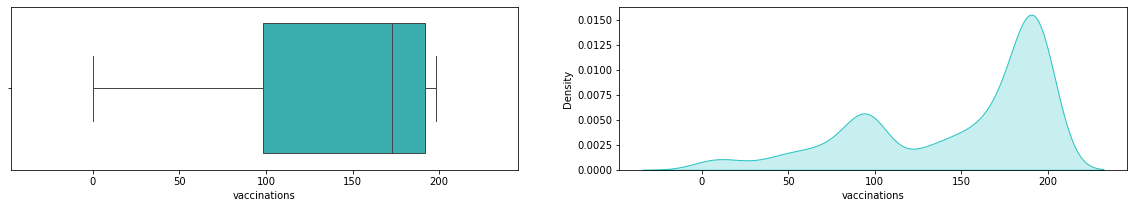

<Figure size 1440x216 with 0 Axes>

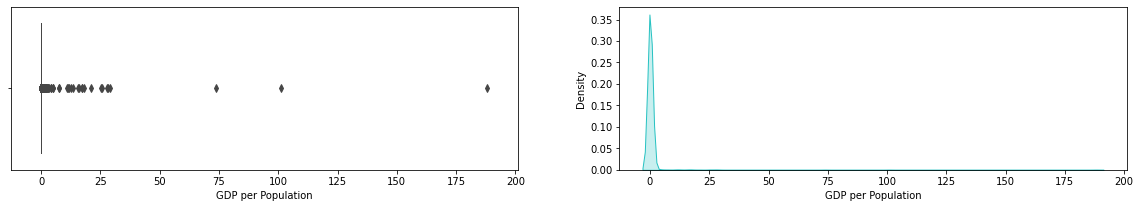

In [66]:
FeatureEngineering.continuous_data_distribution(train_set,countinous_data)

### Skewness values :

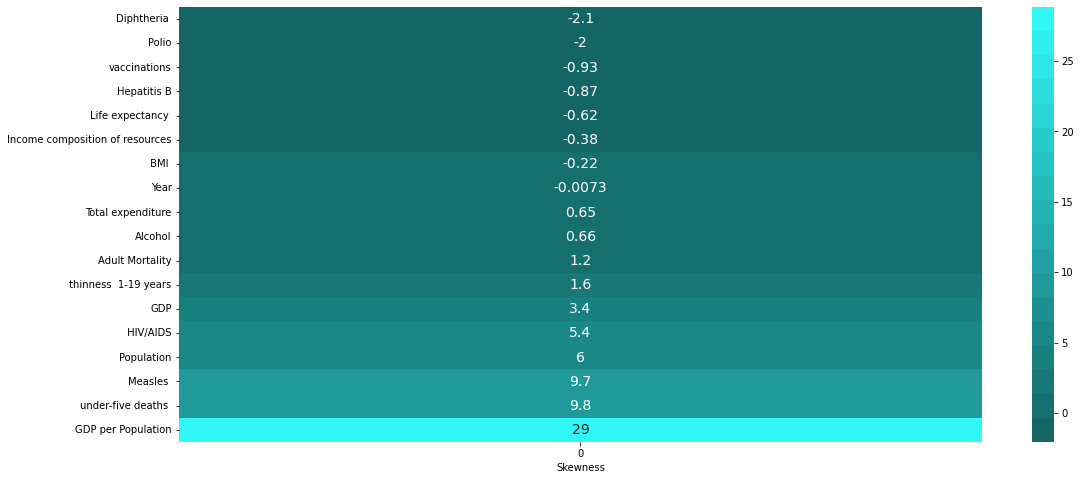

In [67]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(train_set[countinous_data].skew().sort_values(ascending=True)),
            cmap=FeatureEngineering.create_sequential_palette(len(countinous_data)),annot=True,cbar=True,
           annot_kws={'fontsize': 14})
plt.xlabel('Skewness')

plt.show()

### Wow my made column has such skewness !!!!

<b><hr style="border-top: 4px solid black;"/></b>

# Skewness Optimizing :

### `Diphtheria` column :

In [68]:
from sklearn.preprocessing import PowerTransformer
Yeo_j_Diphtheria = PowerTransformer(method='yeo-johnson', standardize=False)

print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['Diphtheria '].skew())
train_set['Diphtheria '] = Yeo_j_Diphtheria.fit_transform(pd.DataFrame(train_set['Diphtheria ']+100))
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['Diphtheria '].skew())

 Skewness before :   -2.0531438564018107
 Skewness now :   -0.7236674934779743


### `Polio` column :

In [69]:
Yeo_j_Polio = PowerTransformer(method='yeo-johnson', standardize=False)

print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['Polio'].skew())
train_set['Polio'] = Yeo_j_Polio.fit_transform(pd.DataFrame(train_set['Polio']+100))
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['Polio'].skew())

 Skewness before :   -2.036690999071503
 Skewness now :   -0.7127324000367498


### `Vaccinations` column :

In [70]:
Yeo_j_Vaccinations = PowerTransformer(method='yeo-johnson', standardize=False)

print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['vaccinations'].skew())
train_set['vaccinations'] = Yeo_j_Vaccinations.fit_transform(pd.DataFrame(train_set['vaccinations']+100))
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['vaccinations'].skew())

 Skewness before :   -0.9328053786443815
 Skewness now :   -0.4541753538252072


### `Adult Mortality` column :

In [71]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['Adult Mortality'].skew())
train_set['Adult Mortality'] = np.log(train_set['Adult Mortality']+20)
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['Adult Mortality'].skew())

 Skewness before :   1.1693903714718195
 Skewness now :   -0.5505299773967451


### `thinness 1-19 years` column :

In [72]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set[' thinness  1-19 years'].skew())
train_set[' thinness  1-19 years'] = np.log(train_set[' thinness  1-19 years']+1)
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set[' thinness  1-19 years'].skew())

 Skewness before :   1.6241154553420298
 Skewness now :   0.12194618770470415


### `GDP` column :

In [73]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['GDP'].skew())
train_set['GDP'] = np.log(train_set['GDP'])
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['GDP'].skew())

 Skewness before :   3.4324415927254472
 Skewness now :   -0.15672344499907614


### `HIV/AIDS` column :

In [74]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set[' HIV/AIDS'].skew())
train_set[' HIV/AIDS'] = np.log(train_set[' HIV/AIDS'])
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set[' HIV/AIDS'].skew())

 Skewness before :   5.355546424021182
 Skewness now :   1.2551639501534708


###### I reduced Skewness but I think now it is fine to let this column go to the model more skewed than others

### `Population` column :

In [75]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['Population'].skew())
train_set['Population'] = np.log(train_set['Population']+80000)
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['Population'].skew())

 Skewness before :   6.0079452416907655
 Skewness now :   -0.24341642237131342


### `Measles` column :

In [76]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['Measles '].skew())
train_set['Measles '] = np.log(train_set['Measles ']+0.1)
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['Measles '].skew())

 Skewness before :   9.72242814506821
 Skewness now :   0.18681115320751487


### `under-five deaths` column :

In [77]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['under-five deaths '].skew())
train_set['under-five deaths '] = np.log(train_set['under-five deaths ']+0.1)
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['under-five deaths '].skew())

 Skewness before :   9.821988601897585
 Skewness now :   -0.01408148868945934


### `GDP per Population` column :

In [78]:
print(Fore.BLACK,"Skewness before : ",Fore.CYAN,train_set['GDP per Population'].skew())
train_set['GDP per Population'] = np.log(train_set['GDP per Population']+0.000001)
print(Fore.BLACK,"Skewness now : ",Fore.CYAN,train_set['GDP per Population'].skew())

 Skewness before :   28.837715183899533
 Skewness now :   0.6843703518814298


## Now we have gone through all skewed features

<b><hr style="border-top: 4px solid black;"/></b>

### Data Distribution Now :

<Figure size 1440x720 with 0 Axes>

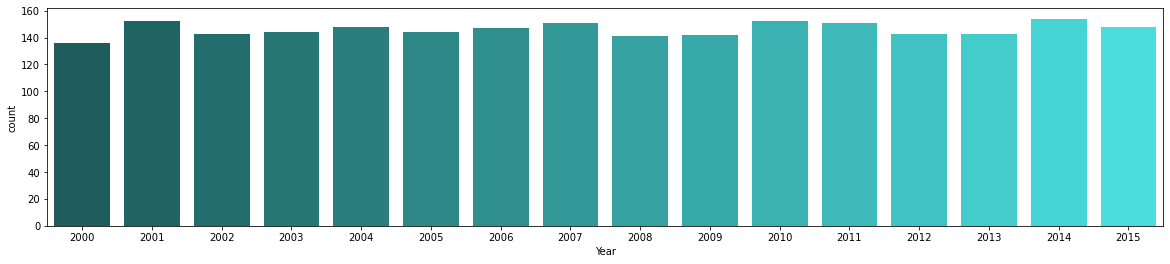

<Figure size 1440x288 with 0 Axes>

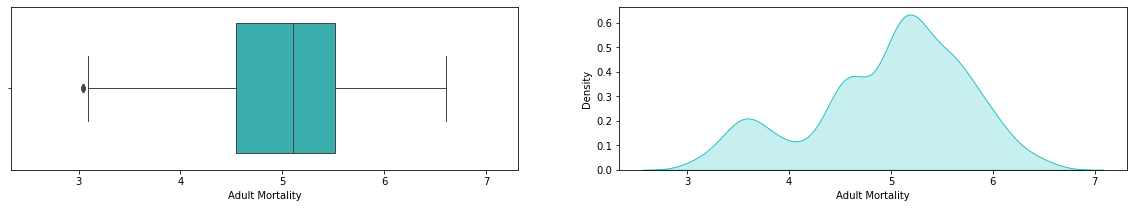

<Figure size 1440x216 with 0 Axes>

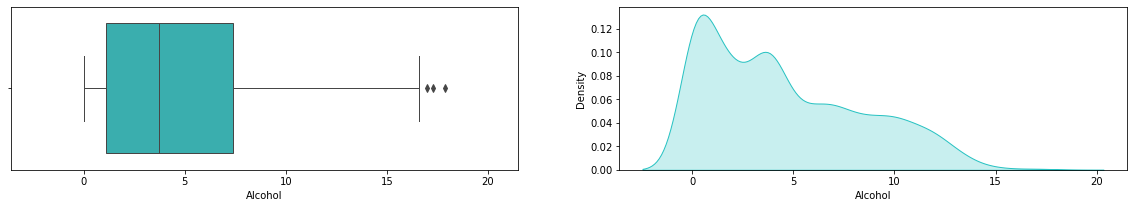

<Figure size 1440x216 with 0 Axes>

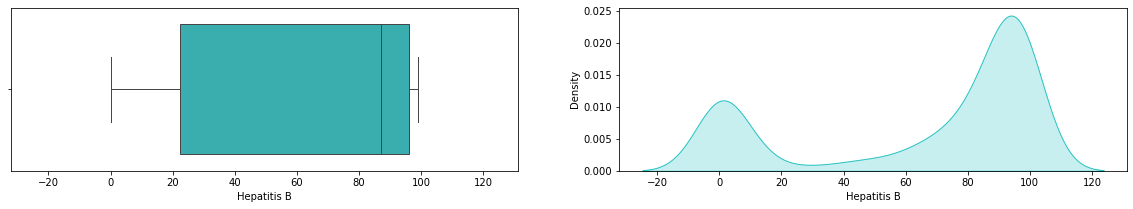

<Figure size 1440x216 with 0 Axes>

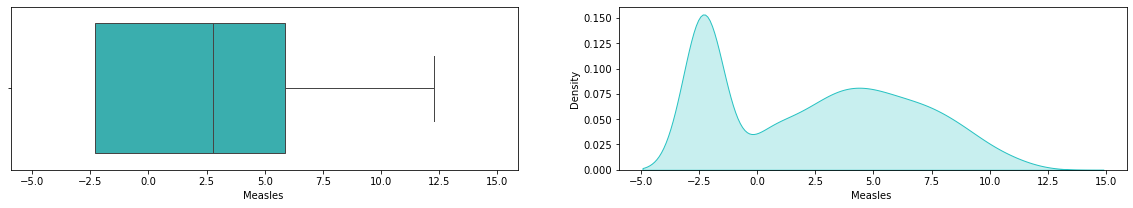

<Figure size 1440x216 with 0 Axes>

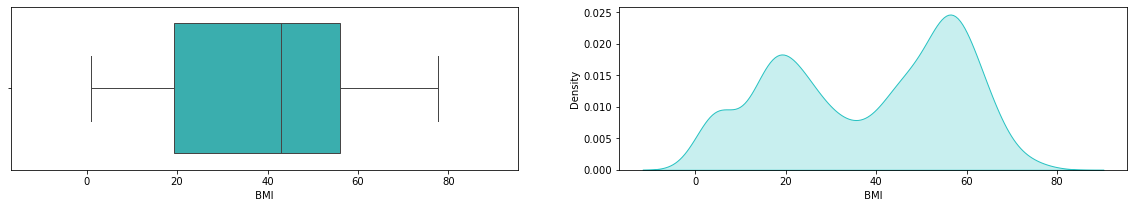

<Figure size 1440x216 with 0 Axes>

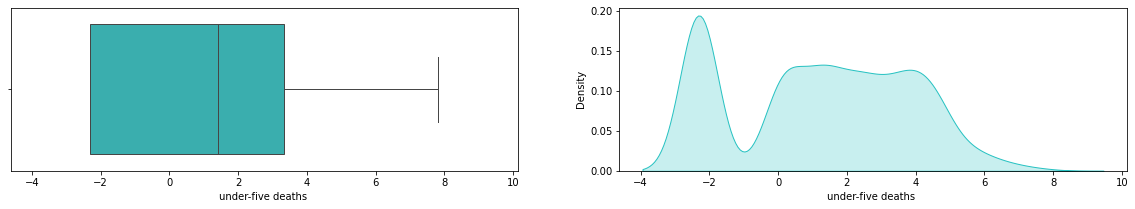

<Figure size 1440x216 with 0 Axes>

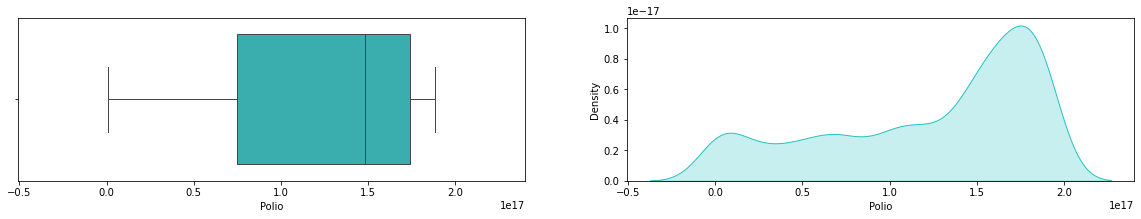

<Figure size 1440x216 with 0 Axes>

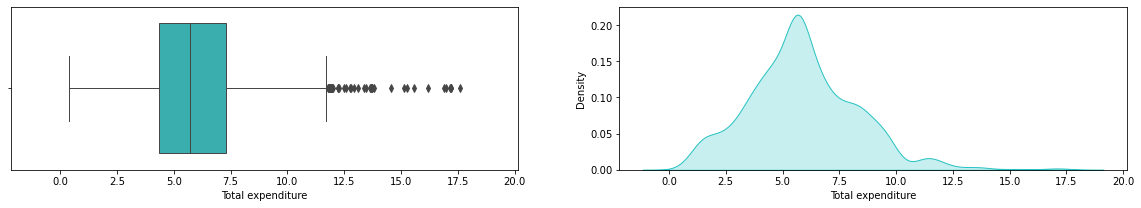

<Figure size 1440x216 with 0 Axes>

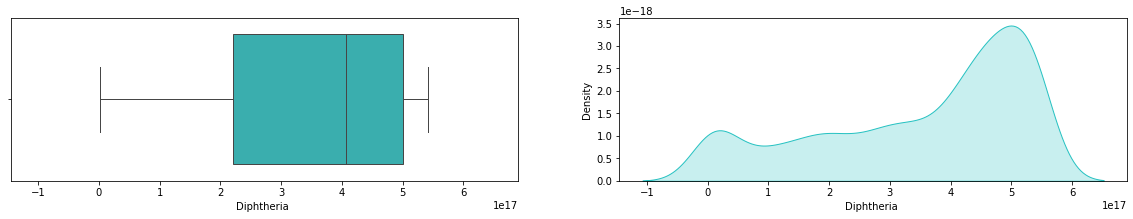

<Figure size 1440x216 with 0 Axes>

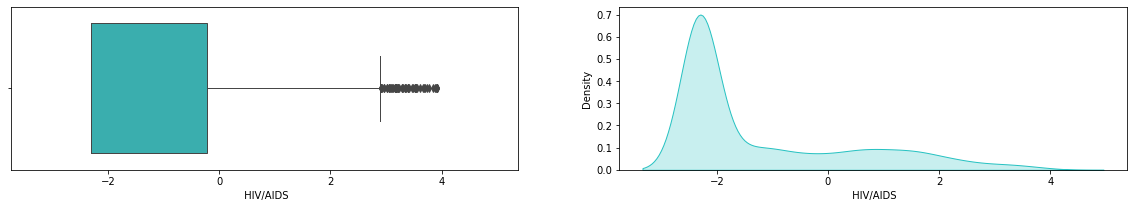

<Figure size 1440x216 with 0 Axes>

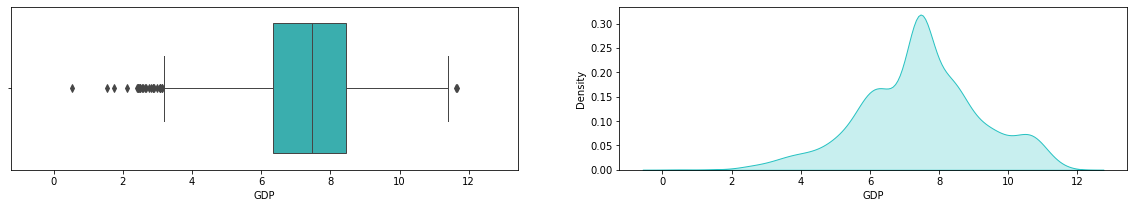

<Figure size 1440x216 with 0 Axes>

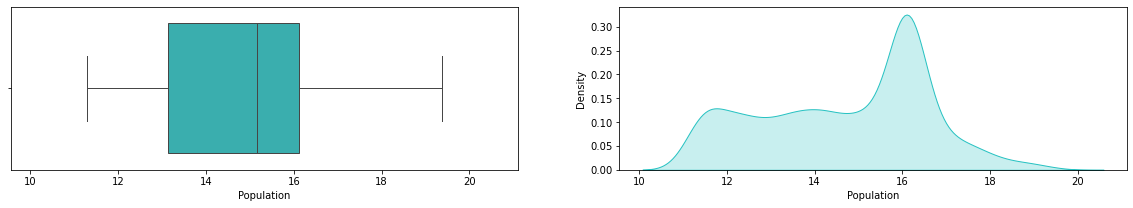

<Figure size 1440x216 with 0 Axes>

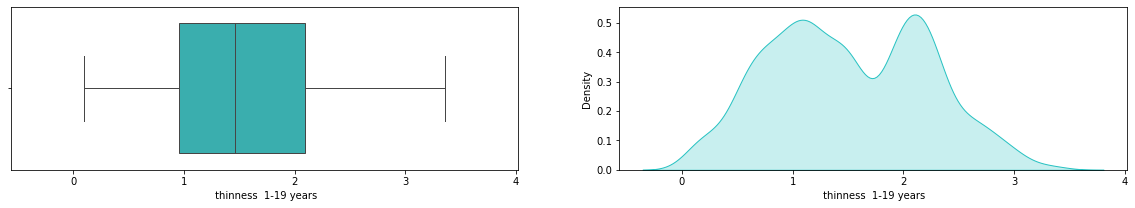

<Figure size 1440x216 with 0 Axes>

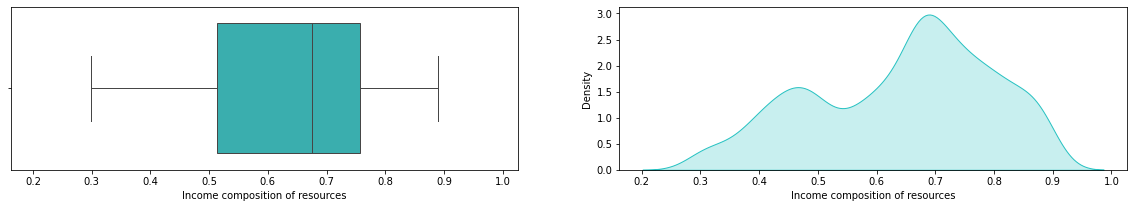

<Figure size 1440x216 with 0 Axes>

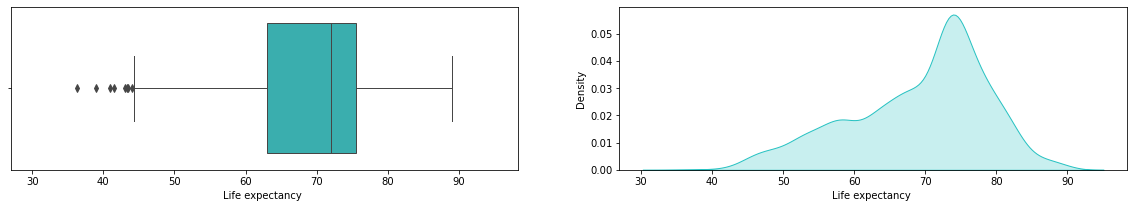

<Figure size 1440x216 with 0 Axes>

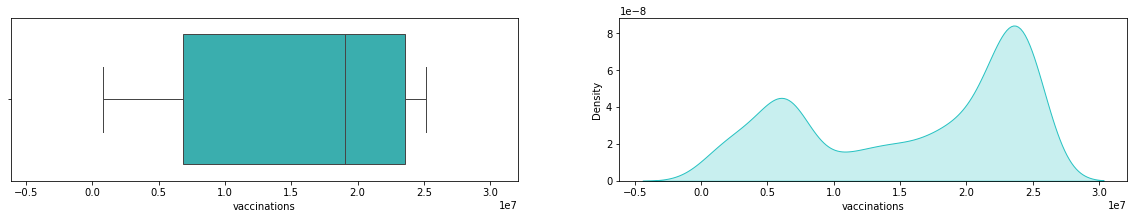

<Figure size 1440x216 with 0 Axes>

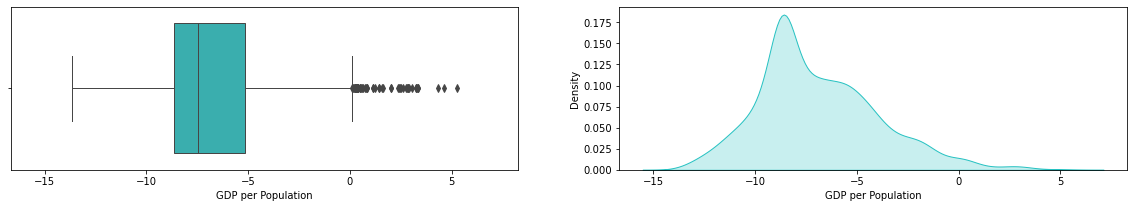

In [79]:
FeatureEngineering.continuous_data_distribution(train_set,countinous_data)

### Skewness now :

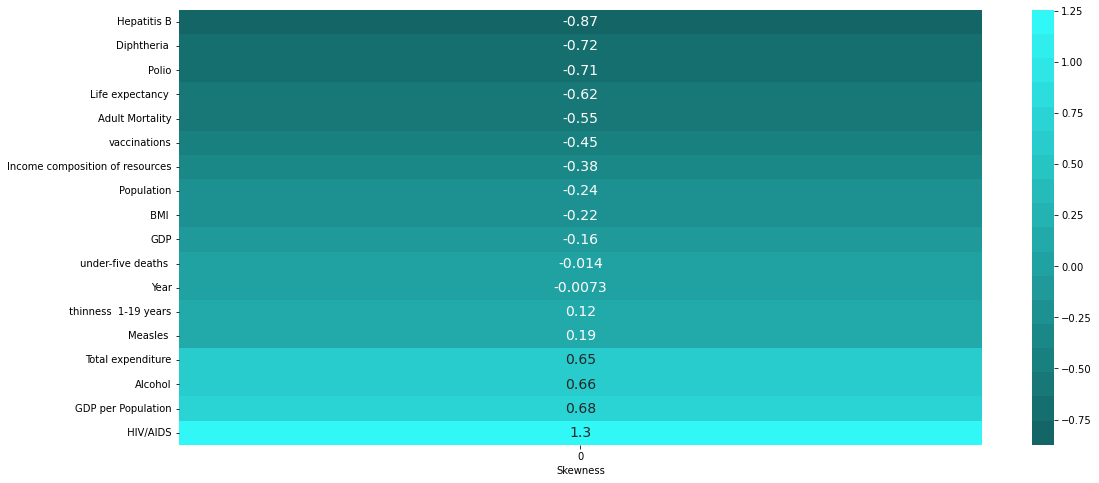

In [80]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(train_set[countinous_data].skew().sort_values(ascending=True)),
            cmap=FeatureEngineering.create_sequential_palette(len(countinous_data)),annot=True,cbar=True,
           annot_kws={'fontsize': 14})
plt.xlabel('Skewness')

plt.show()

<b><hr style="border-top: 4px solid black;"/></b>

### Ok Now last thing to do in the feature engineering process is to do `feature selection`

### I will see which of  the previous features was really important and which were useless then I will have my descisions when making my pipelines

In [81]:
from sklearn.preprocessing import OrdinalEncoder

feature_select_df = train_set.copy()
enc = OrdinalEncoder()

feature_select_df[['Status','Country']] = enc.fit_transform(feature_select_df[['Status','Country']])

x_select = feature_select_df.drop('Life expectancy ',axis=1)
y_select = feature_select_df[['Life expectancy ']]

In [82]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_select, y_select)

for feature, importance in zip(x_select.columns, rf.feature_importances_):
    print(f"{str(feature).strip()}:  {importance:.4f}")

Country:  0.0051
Year:  0.0082
Status:  0.0157
Adult Mortality:  0.2142
Alcohol:  0.0116
Hepatitis B:  0.0029
Measles:  0.0032
BMI:  0.0213
under-five deaths:  0.0203
Polio:  0.0034
Total expenditure:  0.0054
Diphtheria:  0.0027
HIV/AIDS:  0.5942
GDP:  0.0053
Population:  0.0027
thinness  1-19 years:  0.0325
Income composition of resources:  0.0459
vaccinations:  0.0027
GDP per Population:  0.0028


### Ok what we can notice here is that...
> - `HIV/AIDS` is the most importance in `Life expecatncy` and that totally make sence<br><br>
> - column that I added which is `GDP per Population` is useless so I will drop it <br><br>
> - `vaccinations` that I added don't do better that it's individual driving columns so in one of the pipelines I will use it and in another one I won't use that column<br><br>
> - `Population` looks useless and it is skewed so in one of my pipelines I will drop it.

In [83]:
train_set.drop(['GDP per Population'],axis=1,inplace=True)
train_set.head()

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Life expectancy,vaccinations
2268,Serbia,2012,Developing,4.983607,9.380,97.0,-2.302585,58.3,0.095310,1.482114e+17,9.89,3.896089e+17,-2.302585,8.641070,13.592338,1.131402,0.767000,74.9,2.305864e+07
1680,Mauritius,2002,Developing,5.293305,4.140,88.0,-2.302585,26.4,-2.302585,1.205930e+17,4.24,3.429384e+17,-2.302585,8.283371,12.228915,2.186051,0.683000,71.5,1.969985e+07
2785,United Republic of Tanzania,2008,Developing,5.981414,3.440,86.0,8.135376,19.6,4.927978,1.257251e+17,4.21,3.146179e+17,2.001480,7.459862,16.120374,2.116256,0.676000,56.2,1.947367e+07
2512,Sweden,2008,Developed,4.406719,6.900,0.0,3.222868,56.5,-2.302585,1.812015e+17,9.23,5.207500e+17,-2.302585,10.928576,16.045486,0.832909,0.464439,81.1,6.852891e+06
1090,Guinea-Bissau,2015,Developing,5.686975,3.735,87.0,5.031091,26.3,1.808289,1.156448e+17,5.70,3.285107e+17,1.163151,6.391702,12.458876,2.091864,0.421000,58.9,1.924928e+07


## I will build Python script for cleaning methods to run on train/test data
### Before we go let's build a dummy model on this data to know which models generally performs well on this data

<b><hr style="border-top: 4px solid black;"/></b>

## Making dummy data :

In [84]:
x_dummy = train_set.drop(['Hepatitis B','Polio','Life expectancy ','Diphtheria '],axis=1)
y_dummy = train_set[['Life expectancy ']]

x_test_dummy = X_test.copy()
y_test_dummy = y_test.copy()

In [85]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer

encoder = FeatureEngineering.CustomLabelEncoder()
sc = StandardScaler()

imputer_median = SimpleImputer(strategy='median')
imputer_knn = KNNImputer()
impute_by_median_cols = x_dummy.drop(['Population','Country','Status'],axis=1).columns

x_dummy[['Country','Status']] = encoder.fit_transform(x_dummy[['Country','Status']])

imputer_median.fit(x_dummy[impute_by_median_cols])
imputer_knn.fit(x_dummy[['Population']])

x_dummy[x_dummy.columns] = sc.fit_transform(x_dummy[x_dummy.columns])
x_dummy.head()

,Country,Year,Status,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,vaccinations
2268,0.939919,0.966421,0.457614,0.008399,1.237553,-1.165812,1.010899,-0.424849,1.656664,-0.678790,0.687321,-0.589555,-0.537817,0.813275,0.863170
1680,0.238918,-1.205218,0.457614,0.415237,-0.105289,-1.165812,-0.588456,-1.353147,-0.683867,-0.678790,0.480218,-1.304294,0.949458,0.261533,0.452286
2785,1.546190,0.097766,0.457614,1.319176,-0.284677,1.359322,-0.929384,1.446022,-0.696294,1.968020,0.003417,0.735703,0.851031,0.215554,0.424618
2512,1.224109,0.097766,-2.185248,-0.749432,0.602009,0.170896,0.920654,-1.353147,1.383257,-0.678790,2.011757,0.696445,-0.958754,-1.174055,-1.119291
1090,-0.443136,1.617913,0.457614,0.932384,-0.209078,0.608338,-0.593469,0.238296,-0.079057,1.452484,-0.615034,-1.183743,0.816634,-1.459378,0.397168


In [86]:
x_test_dummy.drop(['infant deaths','percentage expenditure',' thinness 5-9 years','Schooling','Diphtheria ']
                  ,axis=1,inplace=True)
x_test_dummy['vaccinations'] = x_test_dummy[['Hepatitis B', 'Polio']].sum(axis=1)
x_test_dummy = x_test_dummy.drop(['Hepatitis B','Polio'],axis=1)


x_test_dummy[['Country','Status']] = encoder.transform(x_test_dummy[['Country','Status']])

x_test_dummy[impute_by_median_cols] = imputer_median.transform(x_test_dummy[impute_by_median_cols])
x_test_dummy['Population'] = imputer_knn.transform(x_test_dummy[['Population']])

# x_test_dummy['Diphtheria '] = Yeo_j_Diphtheria.transform(pd.DataFrame(x_test_dummy['Diphtheria ']+100))
# x_test_dummy['Diphtheria '][x_test_dummy['Diphtheria '] > (1.0e+4)] = x_test_dummy['Diphtheria '].median()
x_test_dummy['vaccinations'] = Yeo_j_Vaccinations.transform(pd.DataFrame(x_test_dummy['vaccinations']+100))
x_test_dummy['Adult Mortality'] = np.log(x_test_dummy['Adult Mortality']+20)
x_test_dummy[' thinness  1-19 years'] = np.log(x_test_dummy[' thinness  1-19 years']+1)
x_test_dummy['GDP'] = np.log(x_test_dummy['GDP'])
x_test_dummy[' HIV/AIDS'] = np.log(x_test_dummy[' HIV/AIDS'])
x_test_dummy['Population'] = np.log(x_test_dummy['Population']+80000)
x_test_dummy['Measles '] = np.log(x_test_dummy['Measles ']+0.1)
x_test_dummy['under-five deaths '] = np.log(x_test_dummy['under-five deaths ']+0.1)

x_test_dummy['Income composition of resources'] = winsorization.transform(pd.DataFrame(x_test_dummy['Income composition of resources']))
x_test_dummy[x_test_dummy.columns] = sc.transform(x_test_dummy[x_test_dummy.columns])
x_test_dummy.head()

,Country,Year,Status,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,vaccinations
2399,1.091487,0.314929,0.457614,1.541432,0.781397,1.489966,0.414275,1.183527,1.035284,2.547898,0.710311,0.405220,0.980797,-0.139137,-0.220664
196,-1.504110,0.749257,0.457614,-1.905921,-1.163675,1.480188,-1.119903,1.478279,-1.131260,-0.678790,-0.420104,2.167902,2.069963,-0.644901,0.925538
2316,0.996757,0.966421,-2.185248,-0.798394,-0.681892,0.296011,-0.287637,-1.353147,-0.692152,-0.678790,1.997929,-1.796514,-0.493045,-0.369645,0.988847
1735,0.314702,0.966421,0.457614,-2.027268,-1.163675,-1.165812,-1.601214,-1.353147,0.563036,-0.678790,0.775177,-1.757110,-0.631866,1.010326,-1.050166
1102,-0.443136,-0.988054,0.457614,-1.204320,-0.612699,1.097847,-0.959466,0.348077,-0.112197,1.675655,-2.231811,-1.285421,1.195966,1.621183,-1.487734


## Now data looks like perfect `Raw Data` ready for the model
### Let's test different models :

In [87]:
# from lazypredict.Supervised import LazyRegressor
# from sklearn.model_selection import train_test_split

# regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = regressor.fit(x_dummy, x_test_dummy, y_dummy, y_test_dummy)

# models.to_csv('Datasets/best_models.csv')

models = pd.read_csv('Datasets/best_models.csv',index_col='Model')
models.head(30)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.966915,0.967763,1.669878,0.631564
RandomForestRegressor,0.959817,0.960848,1.840286,1.086927
LGBMRegressor,0.959434,0.960474,1.849038,0.083284
HistGradientBoostingRegressor,0.959116,0.960164,1.856276,0.520506
BaggingRegressor,0.950891,0.952150,2.034454,0.119382
XGBRegressor,0.949967,0.951250,2.053493,0.154333
GradientBoostingRegressor,0.940672,0.942193,2.236121,0.445803
ExtraTreeRegressor,0.911019,0.913301,2.738510,0.015831
DecisionTreeRegressor,0.910985,0.913267,2.739043,0.025995


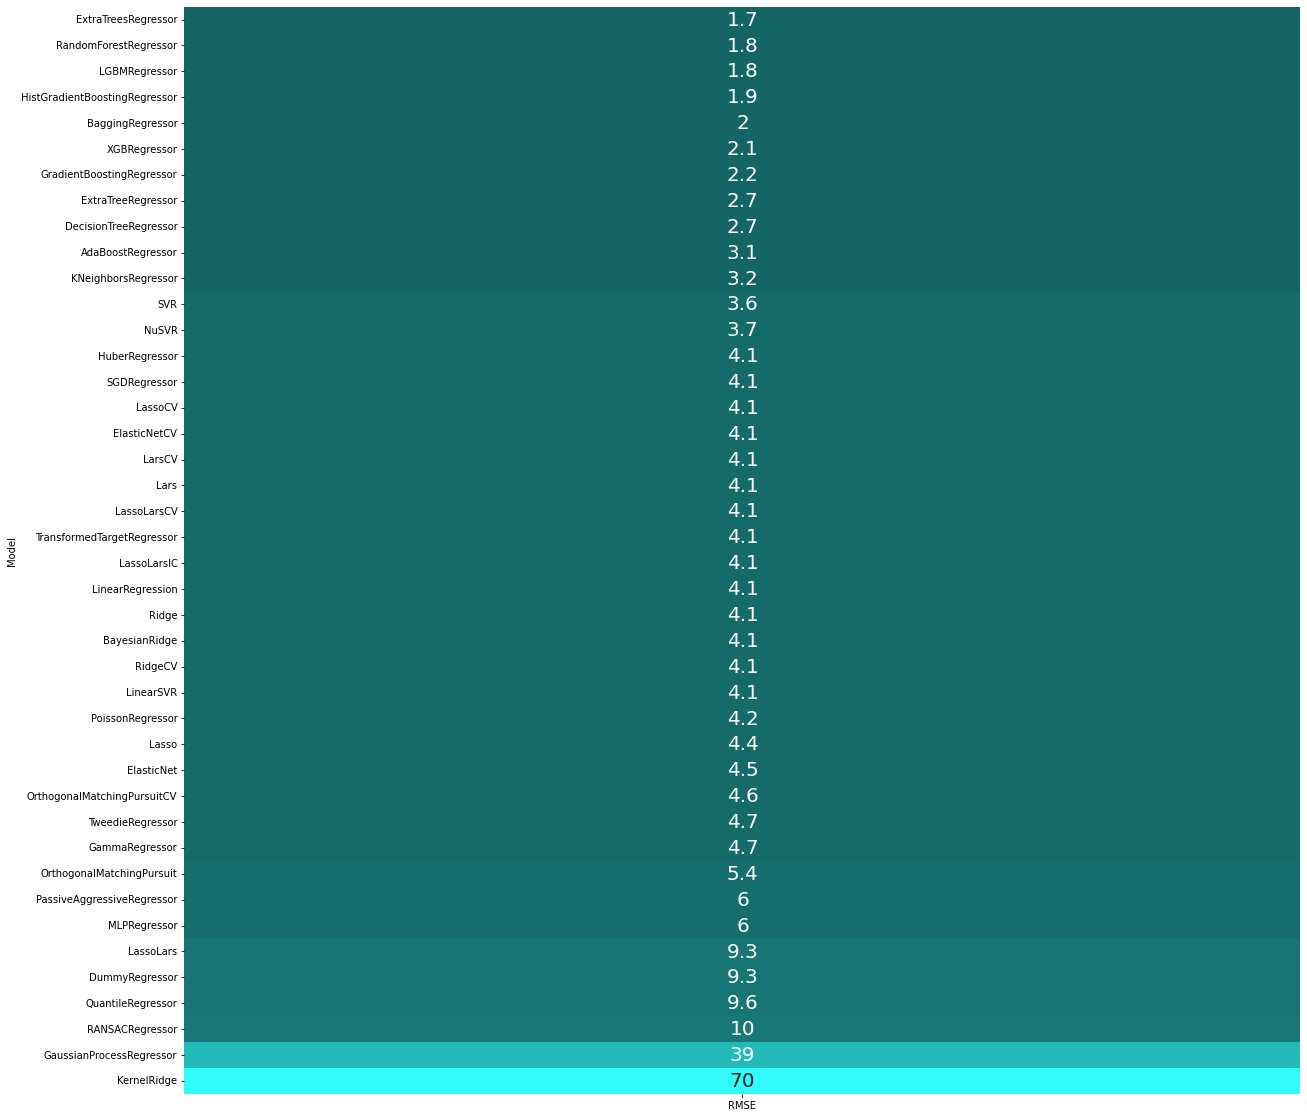

In [88]:
plt.figure(figsize=(20, 20))

sns.heatmap(pd.DataFrame(models['RMSE']).sort_values(by='RMSE',ascending=True),
            cmap=FeatureEngineering.create_sequential_palette(len(models))
            ,annot=True,cbar=False,annot_kws={"size": 20})

plt.show()

### Ok looks like `ensamble learning` gives best models...
### this was expected generally `ensamble learning models` performs well on tabular data


#### Saving the data :

In [89]:
X_train.to_csv('Datasets/xtrain_data.csv')
y_train.to_csv('Datasets/ytrain_data.csv')
X_test.to_csv('Datasets/xtest_data.csv')
y_test.to_csv('Datasets/ytest_data.csv')

<br><br><br><br>
# Let's continoue making the model on another notebooks...